# PROJET 5 : Catégorisez automatiquement les questions 

**PLAN DE PROJET**
1. Titre de projet : PROJET 5 - Catégorisez automatiquement les questions


2. Chargement de bibliothèques


3. Récupérer les données + Séparation de données en test et train
    - Enregistrement de fichiers en .csv :
        - X_train.csv
        - y_train.csv
        - X_test.csv
        - y_test.csv


4. Data cleaning
    - Features :
        - Enlever les balises HTML
        - Enlever la ponctuation
        - Mise en minuscule et tokenization
        - Enlever les stopwords
    - Target :
        - Enlever les balises "<>"


5. Feature engineering 
    - Recodage en bigrams
    - Fusion de title, body + bigrams


6. Analyse exploratoire
    - Analyses univariées
        - Description générale : Longueur de posts, nombre de tags
        - Bag of words : Les expressions les plus fréquentes : feature & target
            - Arrays générées:
                - X_train_bow
                - X_train_vocab_bow
                - X_train_dist_bow
                - y_train_bow
                - y_train_vocab_bow
                - y_train_dist_bow
                
                
        - TF - IDF : Les expressions les plus fréquentes : feature & target
             - Arrays générées:
                  - X_train_ifidf
                  - X_train_vocab_ifidf
                  - X_train_dist_ifidf
                  - y_train_ifidf
                  - y_train_vocab_ifidf
                  - y_train_dist_ifidf
                  

    - Analyse multivarié 
    **QUESTION : Peut-on considérer LDA comme analyse multivariée ?**
    
    
    - Réduction de dimensions
    **QUESTION : Peut-on faire un word2vec ?**
    
    
        

# Chargement de bibliothéques

In [1]:
# Import the libraries
import joblib
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

import nltk
#nltk.download()  # Download text data sets, including stop words
from nltk.corpus import stopwords # Import the stop word list
import re

from bs4 import BeautifulSoup 
from gensim import corpora
from gensim import models
import numpy as np
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.svm import LinearSVC
from nltk.stem import WordNetLemmatizer 

# Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Disable warning for .loc
pd.options.mode.chained_assignment = None  # default='warn'

# Récupération de données

## Loader les fichiers .csv

In [169]:
# Load the .csv files
X_train = pd.read_csv('Data/X_train.csv', sep='\t')
X_test = pd.read_csv('Data/X_test.csv', sep='\t')
y_train = pd.read_csv('Data/y_train.csv', sep='\t', header=None)
y_test = pd.read_csv('Data/y_test.csv', sep='\t', header=None)

In [4]:
# Check the loaded files
print ("Le jeu de données X_train contient", X_train.shape[0], "observations et", X_train.shape[1], "features.") 
print ("Le vecteur y_train contient", y_train.shape[0], "observations.") 
print ("Le jeu de données X_test contient", X_test.shape[0], "observations et", X_test.shape[1], "features.") 
print ("Le vecteur y_test contient", y_test.shape[0], "observations.")  

Le jeu de données X_train contient 25000 observations et 3 features.
Le vecteur y_train contient 25000 observations.
Le jeu de données X_test contient 25000 observations et 3 features.
Le vecteur y_test contient 25000 observations.


## Récupérer les arrays

### Bag of words

In [5]:
# Load the arrays 
X_train_bow = np.load('Data/X_train_bow.npy')
X_train_vocab_bow = np.load('Data/X_train_vocab_bow.npy')
X_train_dist_bow = np.load('Data/X_train_dist_bow.npy')
y_train_bow = np.load('Data/y_train_bow.npy')
y_train_vocab_bow = np.load('Data/y_train_vocab_bow.npy')
y_train_dist_bow = np.load('Data/y_train_dist_bow.npy')
X_train_title_bow = np.load('Data/X_train_title_bow.npy')
X_train_title_vocab_bow = np.load('Data/X_train_title_vocab_bow.npy')
X_train_title_dist_bow = np.load('Data/X_train_title_dist_bow.npy')
X_train_w_bow = np.load('Data/X_train_w_bow.npy')
X_train_w_vocab_bow = np.load('Data/X_train_w_vocab_bow.npy')
X_train_w_dist_bow = np.load('Data/X_train_w_dist_bow.npy')
X_train_w_2gram_bow = np.load('Data/X_train_w_2gram_bow.npy')
X_train_w_2gram_vocab_bow = np.load('Data/X_train_w_2gram_vocab_bow.npy')
X_train_w_2gram_dist_bow = np.load('Data/X_train_w_2gram_dist_bow.npy')
y_train_0p1_bow = np.load('Data/y_train_0p1_bow.npy')
y_train_0p1_vocab_bow = np.load('Data/y_train_0p1_vocab_bow.npy')
y_train_0p1_dist_bow = np.load('Data/y_train_0p1_dist_bow.npy')

### TF-IDF

In [6]:
# Load the arrays 
X_train_tfidf = np.load('Data/X_train_tfidf.npy')
X_train_vocab_tfidf = np.load('Data/X_train_vocab_tfidf.npy')
X_train_dist_tfidf = np.load('Data/X_train_dist_tfidf.npy')
y_train_tfidf = np.load('Data/y_train_tfidf.npy')
y_train_vocab_tfidf = np.load('Data/y_train_vocab_tfidf.npy')
y_train_dist_tfidf = np.load('Data/y_train_dist_tfidf.npy')
X_train_title_tfidf = np.load('Data/X_train_title_tfidf.npy')
X_train_title_vocab_tfidf = np.load('Data/X_train_title_vocab_tfidf.npy')
X_train_title_dist_tfidf = np.load('Data/X_train_title_dist_tfidf.npy')
X_train_w_tfidf = np.load('Data/X_train_w_tfidf.npy')
X_train_w_vocab_tfidf = np.load('Data/X_train_w_vocab_tfidf.npy')
X_train_w_dist_tfidf = np.load('Data/X_train_w_dist_tfidf.npy')
X_train_w_2gram_tfidf = np.load('Data/X_train_w_2gram_tfidf.npy')
X_train_w_2gram_vocab_tfidf = np.load('Data/X_train_w_2gram_vocab_tfidf.npy')
X_train_w_2gram_dist_tfidf = np.load('Data/X_train_w_2gram_dist_tfidf.npy')

### Word2vect

In [7]:
X_train_post_w2v1 = np.load('Data/X_train_post_w2v1.npy')
X_train_title_w2v1 = np.load('Data/X_train_title_w2v1.npy')
X_train_post_w2v1 = np.load('Data/X_train_post_w_w2v1.npy')
X_train_post_w2v2 = np.load('Data/X_train_post_w2v2.npy')
X_train_title_w2v2 = np.load('Data/X_train_title_w2v2.npy')
X_train_post_w2v2 = np.load('Data/X_train_post_w_w2v2.npy')

# Modélisation de flags basée sur les fréquences

## Fréquences BOW

Nous allons mettre en oeuvre une méthode basée uniquement sur les fréquences des expressions (mot / bigram) utilisées dans le post et nous allons regarder si les expressions les plus fréquentes apparaissent dans le vocabulaire de tags.

Tout d'abord, nous allons analyser s'il existe un ou plusieurs expressions, présentes au moins deux fois dans chaque post, qui matchent avec le vocabulaire de tags. 

Nous allons utiliser la décomposition en Bag of words créé dans le notebook1, chapître 6.1.2 :

In [8]:
#The tags vocabulary :
y_train_vocab_bow[:10]

array(['.hgtags', '.htaccess', '.lib', '.net', '.net-3.5', '.net-4.5',
       '.net-4.6.1', '.net-4.6.2', '.net-4.7.2', '.net-core'],
      dtype='<U32')

In [9]:
#The features vocabulary : 
X_train_vocab_bow[:10]

array(['##', '####', '#-#', '#-create', '#-error', '#-main', '#-object',
       '#-split', '#-x', '#define'], dtype='<U58')

In [10]:
#The BOW array :
X_train_bow[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Tester les fonctions sur le premier post

Nous allons tester notre idée sur le premier post.

In [11]:
BOW_post1 = X_train_bow[0]
BOW_post1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
#We print all expressions which are at least 2 times in the post :
for freq, word in zip(BOW_post1, X_train_vocab_bow):
    if freq >= 2:
        print (freq, word)

2 block
2 discrete
3 result
2 rule
2 simulink
3 time


In [13]:
#We compare the frequent expression to the tag's vocab:

for freq, word in zip(BOW_post1, X_train_vocab_bow):
    if freq >= 2:
        if word in y_train_vocab_bow:
            print(word)

block
simulink
time


In [14]:
predicted_tags_vect = []

for freq, word in zip(BOW_post1, X_train_vocab_bow):
    if freq >= 2:
        if word in y_train_vocab_bow:
            predicted_tags_vect.append(word)

predicted_tags_vect

['block', 'simulink', 'time']

### Création d'une fonction à appliquer sur toutes les données

Maintenant, nous allons créer une fonction qui va sortir les tags pour chaque post :

In [15]:
def pred_tag_freq(BOW, vocabulary, list_of_tags):
    
    """Function which generates a list of tags, based on frequency of expression in a BOW object and 
    its comparison to predefined list of tags.
    
    Input :
    - BOW : a BOW array
    - vocabulary : list of BOW vocabulary
    - list_of_tags : a list of tags
    
    Output :
    - a list of predicted tags  
    
    """
    predicted_tags = []
    
    for vect in range(BOW.shape[0]): 
        
        predicted_tags_vect = [] 
        
        for freq, word in zip(BOW[vect], vocabulary):
            
            if freq >= 2:
                if word in list_of_tags:
                    predicted_tags_vect.append(word)
                    
        predicted_tags.append(predicted_tags_vect)
        
    return predicted_tags

In [16]:
predicted_tags = pred_tag_freq(X_train_bow, X_train_vocab_bow, y_train_vocab_bow)

In [17]:
len(predicted_tags)

25000

In [18]:
predicted_tags[:10]

[['block', 'simulink', 'time'],
 ['arangodb', 'direction', 'graph', 'traversal'],
 ['api', 'call', 'center', 'interactive', 'mfa'],
 ['draw'],
 ['android', 'json', 'nested', 'parsing'],
 ['image', 'insert', 'move'],
 ['api', 'com', 'http', 'weather', 'yahoo'],
 ['file', 'window'],
 ['binary', 'output', 'plc'],
 ['call', 'class', 'go', 'instance', 'logic']]

Sauvegarder les tags prédits:

In [19]:
#Save the predicted tags:
np.save('Data/predicted_tags', predicted_tags)

Nous allons analyser le nombre de tag prédits par la méthode :

In [20]:
nbr_tags = []

for tag in range(len(predicted_tags)):
    length = len(predicted_tags[tag])
    nbr_tags.append(length)
    
nbr_tags = DataFrame(nbr_tags)

In [21]:
nbr_tags[0].value_counts()

3     4450
2     4392
4     3728
1     3211
5     2660
6     1784
0     1296
7     1188
8      758
9      516
10     313
11     210
12     154
13      93
14      57
15      47
17      28
16      27
18      18
20      12
19      11
21      11
22       7
25       6
23       3
43       2
38       2
24       2
29       2
40       2
32       2
27       2
30       1
28       1
35       1
39       1
50       1
26       1
Name: 0, dtype: int64

Désavantage de la méthode : nous avons des posts sans tag attribué (479 posts) et certains posts peuvent avoir un grand nombre de tags, même si c'est plutôt rare. Nous allons appliquer la même méthode avec TF-IDF et choisir 3 tags les plus fréquents basé sur le coefficient TF-IDF. 

## Fréquences TF-IDF

L'idée est d'utiliser les fréquences TF-IDF pour avoir la main sur le nombre de tags à prédire. Cette fois-ci, la méthode sera basé sur la procédure suivante :

1. Nous allons comparer toutes les expressions dans le post avec le vocabulaire de tags
2. Nous allons attribuer à chaque expression la distance relative TF-IDF de tag
3. Nous allons sortir 3 tags les plus fréquents

In [22]:
y_train_dist_tfidf[:10]

array([36.09477409, 94.12928377,  1.93087961,  1.10520054,  1.35736572,
       52.8110813 ,  1.47627147,  1.31170276,  1.18964862,  2.24762487])

### Tester les fonctions sur le premier post

In [23]:
#Extract the array of first post
TFIDF_post1 = X_train_tfidf[0]
TFIDF_post1

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
#We compare the expressions in the post to the tag's vocab:
for freq, word in zip(TFIDF_post1, X_train_vocab_tfidf):
    if freq > 0:
        if word in y_train_vocab_tfidf:
            print(word)

block
delay
formula
function
time


In [25]:
#We list the common expressions which are in both document and the tag's vocabulary:

liste_tags = []

for freq, word in zip(TFIDF_post1, X_train_vocab_tfidf):
    if freq > 0:
        if word in y_train_vocab_tfidf:
            liste_tags.append(word)

In [26]:
liste_tags

['block', 'delay', 'formula', 'function', 'time']

In [27]:
#We zip the list with tag's relative frequency:

for freq, word in zip(y_train_dist_tfidf, liste_tags):
    print(freq, word)

36.09477408840543 block
94.1292837673372 delay
1.9308796101821133 formula
1.1052005401823712 function
1.3573657228831362 time


In [28]:
#Zip the tags contained in the post and tag's frequency
liste = zip(y_train_dist_tfidf, liste_tags)

In [29]:
#Converting to list
liste = list(liste)

In [30]:
#Check
liste

[(36.09477408840543, 'block'),
 (94.1292837673372, 'delay'),
 (1.9308796101821133, 'formula'),
 (1.1052005401823712, 'function'),
 (1.3573657228831362, 'time')]

In [31]:
#Sort the list by frequency
liste_sort = sorted(liste, key = lambda x: x[0])

In [32]:
#Check
liste_sort

[(1.1052005401823712, 'function'),
 (1.3573657228831362, 'time'),
 (1.9308796101821133, 'formula'),
 (36.09477408840543, 'block'),
 (94.1292837673372, 'delay')]

In [33]:
#Extract 3 most frequent tags 
tags_final = liste_sort[-3:]

In [34]:
tags_final

[(1.9308796101821133, 'formula'),
 (36.09477408840543, 'block'),
 (94.1292837673372, 'delay')]

In [35]:
#Extract the tag's name
tags = [x[1] for x in tags_final]

In [36]:
tags

['formula', 'block', 'delay']

### Appliquer la fonctions sur toutes les données

Maintenant, nous allons créer une fonction qui va sortir les tags pour chaque post :

In [37]:
# At first, we will test the function on a sample
test_sample = X_train_tfidf[:100]

In [38]:
test_sample.shape

(100, 5000)

In [39]:
def pred_tag_tfidf(tfidf_array, tfidf_vocabulary, list_of_tags):
    
    """Function generatig a list of tags, based on frequency of expression in an TF-IDF object and 
    its comparison to predefined list of tags. 
    
    Is the document contains more than 3 common expressions with the list of tags, the tags are sorted by the 
    TF-IDF frequency and only 3 most common tags are the predicted tags. If the document contains 
    2 or less common expressions, all the expressions are considered comme predicted tags. 
        
    Input :
    - tfidf_array : a TF-IDF array
    - tfidf_vocabulary : a TF-IDF vocabulary object
    - list_of_tags : a vocabulary of tags
    
    Output :
    - a list of predicted tags  
    
    """
    predicted_tags = []
    
    for doc in range(tfidf_array.shape[0]): 
       
        #We list the common expressions which are in both document and the tag's vocabulary:   
    
        liste_tags = []

        for freq, word in zip(tfidf_array[doc], tfidf_vocabulary):
            if freq > 0:
                if word in list_of_tags:
                    liste_tags.append(word)
                    
            liste = list(zip(y_train_dist_tfidf, liste_tags))      
            
            #Sort the list by frequency
            liste_sort = sorted(liste, key = lambda x: x[0])
            
            #Choose only 3 most frequent expressions
            tags_final = liste_sort[-3:]
            
            #Extract the tag's name
            tags = [x[1] for x in tags_final]
                    
        predicted_tags.append(tags)
    
    return predicted_tags

In [40]:
# Fit the sample
liste = pred_tag_tfidf(test_sample, X_train_vocab_tfidf, y_train_vocab_tfidf)

In [41]:
# Check n#1
len(liste)

100

In [42]:
# Check n#2
liste[:10]

[['formula', 'block', 'delay'],
 ['http', 'com', 'graph'],
 ['account', 'token', 'api'],
 ['io', 'algorithm', 'function'],
 ['add', 'hashmap', 'android'],
 ['button', 'insert', 'click'],
 ['api', 'header', 'authorization'],
 ['list', 'access', 'file'],
 ['output', 'binary', 'input'],
 ['class', 'file', 'command']]

In [43]:
# Fit all the data
predicted_tags = pred_tag_tfidf(X_train_tfidf, X_train_vocab_tfidf, y_train_vocab_tfidf)

### Description de tags prédits

Nous allons regarder le nombre de tags par post :

In [44]:
nbr_tags = []

for tag in range(len(predicted_tags)):
    length = len(predicted_tags[tag])
    nbr_tags.append(length)
    
nbr_tags = DataFrame(nbr_tags)

In [45]:
nbr_tags[0].value_counts()

3    23587
2      930
1      401
0       82
Name: 0, dtype: int64

La plupart de posts ont 3 tags, tandis que seulement 35 posts n'ont aucun tag.

Combien d'expressions nous avons au total ? Pour répondre à la question, nous allons créer un vocabulaire de tags prédits avec bag of words.

In [46]:
# Format the lists to strings
" ".join(predicted_tags[0])

'formula block delay'

In [47]:
# Format the lists to strings

predicted_tags_str = []

for i in range(len(predicted_tags)):
    elt = " ".join(predicted_tags[i])
    predicted_tags_str.append(elt)

In [48]:
predicted_tags_str[:10]

['formula block delay',
 'http com graph',
 'account token api',
 'io algorithm function',
 'add hashmap android',
 'button insert click',
 'api header authorization',
 'list access file',
 'output binary input',
 'class file command']

In [49]:
#Second execution after stop-words update
print ("Creating the bag of words...\n")

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             strip_accents=None,
                             max_features = 5000,
                             lowercase=False,
                             stop_words = None)                       
                            

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

predicted_tags_bow = vectorizer.fit_transform(predicted_tags_str)

Creating the bag of words...



In [50]:
predicted_tags_bow = predicted_tags_bow.toarray()

In [51]:
# Create a vocabulary of features
predicted_tags_vocab_bow = vectorizer.get_feature_names()

In [52]:
predicted_tags_vocab_bow[:10]

['aar',
 'absolute',
 'abstract',
 'access',
 'accordion',
 'account',
 'action',
 'active',
 'adapter',
 'add']

In [53]:
len(predicted_tags_vocab_bow)

955

Nous avons réduit le nombre de tags de ~5k à 1k.

Afficher les expressions les plus courantes:

In [54]:
# Sum up the counts of each vocabulary word
predicted_tags_dist_bow = np.sum(predicted_tags_bow, axis=0)

In [55]:
freq_tags_bow = DataFrame(zip(predicted_tags_vocab_bow, predicted_tags_dist_bow))
freq_tags_bow.rename({0:'Word', 1:'Frequence'}, axis = 1, inplace = True)
freq_tags_bow.sort_values(['Frequence'], inplace = True, ascending=False)
freq_tags_bow['Pourcentage'] = round(freq_tags_bow['Frequence']*100/sum(freq_tags_bow['Frequence']),2)
freq_tags_bow[:50]

Word  Frequence  Pourcentage
9           add       2401         3.29
297        file       1841         2.53
3        access       1489         2.04
35          api       1484         2.04
324    function       1477         2.03
130       class       1474         2.02
27      android       1136         1.56
102      button       1093         1.50
144         com        977         1.34
147     command        963         1.32
192    database        826         1.13
100       build        774         1.06
29      angular        746         1.02
459        line        649         0.89
464        list        649         0.89
133       click        626         0.86
380        http        615         0.84
257     element        586         0.80
387       image        557         0.76
97      browser        546         0.75
134      client        543         0.75
228     display        537         0.74
166    contains        537         0.74
550      object        531         0.73
200        date        526         0.72
566      output        495         0.68
6        action        477         0.65
379        html        466         0.64
753         set        454         0.62
653      python        449         0.62
80          bit        445         0.61
70   background        440         0.60
295       field        436         0.60
251        edit        432         0.59
339          go        428         0.59
209     default        427         0.59
161     console        426         0.58
854        time        426         0.58
401       input        417         0.57
425        java        381         0.52
5       account        377         0.52
638     project        369         0.51
121   character        363         0.50
116        cell        353         0.48
84        block        349         0.48
169  controller        347         0.48
750      server        347         0.48
40        apply        343         0.47
501     message        330         0.45
194   dataframe        325         0.45

# Modélisation non supervisée

## LDA

In [56]:
print ("Number of unique tags: %d" % len(y_train_vocab_tfidf))

Number of unique tags: 5000


Nous allons faire LDA afin de trouver des sujets de posts. Etant donné que nous avons un grand nombre de tags uniques (~5k), nous allons réformuler les tags existants à l'aide de mots clés caractéristiques pour chaque sujet. 

Nous allons essayer de trouver un nombre de sujets optimal, pour que les sujets soient interprétables. 

Dans un premier temps, nous allons créer deux fonctions qui vont entraîner le modèle avec un nombre donné de sujets et afficher un nombre de mots le plus important pour chaque sujet.

In [57]:
def fit_lda(X, no_topics):
    """Fit and return LDA model for data X with no_topics.
    
    INPUT:
    - X : data matrice 
    - no_topics : number of topics
    
    OUTPUT:
    - LDA model   
    
    """
    
    
    lda = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=20,
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=0).fit(X_train_tfidf)
    return lda

In [58]:
def display_topics(vocabulary, model, no_top_words=10):
    """Display no_top_words for each topic (10 by default) of LDA model.
    
    INPUTS: 
    - vocabulary: a vector of vocabulary
    - model: the fitted LDA model 
    - no_top_words: number of words to display
    OUTPUT:
    - print no_top_words for each topic
    """
    
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d" % (topic_idx))
        print (" ".join([vocabulary[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### Fitting BOW

#### Document = post pondéré

In [59]:
lda = fit_lda(X_train_w_bow, 20)
display_topics(X_train_w_vocab_bow, lda)

Topic 0
afterwards ani abstractauthenticationprocessingfilter abstractautoserviceregistration arcore buttonadapter buildsteps anim architecture buildflag
Topic 1
adddbcontext bokeh bugreport aebigbm began barebones abfb asset affordable autofixture
Topic 2
arrayadapter bottomsheetdiaogfragment appcenter callkit arraybufer asana amanad affectation bidbook addeventlistener
Topic 3
ameshu bbiqwd bbh arrive arnold asintodimensionindexmap banned callgrind admire arns
Topic 4
activedocument basecolor activeelement ad approuter adipiscing beforeupdate admitted beancreationexception afterwords
Topic 5
aceptar avbin activitya allaigre bootcamp areacode annually actully applicationcontext actionexecutedcontext
Topic 6
bla addr accountability baseurl blabla authenticationmechanismshandler activates avgdaysusearray boiled bauerwhitetails
Topic 7
actionname aca appication callfeature become accelerated applicatoin azuredevops axd accelerating
Topic 8
asaro appendix asciidoc ari authenticationprinci

In [60]:
lda = fit_lda(X_train_w_bow, 15)
display_topics(X_train_w_vocab_bow, lda)

Topic 0
bitwiseshiftleft apachejmeter avaudiorecorder appcenter arra authorizationtoken accord blogginl autoincremet bidaf
Topic 1
advertised advertisement camera analyzejar arworldmap asting cameraactivity basexclient admob aeiaaioooaauuaeiou
Topic 2
appication aurelkurtula bulbu app ani abstractauthenticationprocessingfilter arcore abstractautoserviceregistration buildsteps buttonadapter
Topic 3
addcookietoresponse aws ari authenticationprincipal assertionerror authenticationprovider amt activies bufferedstream arima
Topic 4
aebigbm bugreport actully bokeh adddbcontext asset abfb ansong autoincrementing barebones
Topic 5
actionname aca broadcasted broadcasting callfeature apposed allot aginity analitics bfgs
Topic 6
apporach adddatasource aceptar advert bent appcomponent bootcamp +ba accelerated acccess
Topic 7
bla accountability blabla appendchild acceptsecuritycontext buf arn baseactivityeventlistener accountbc azurewebsites
Topic 8
#whoosh aab authenticationmechanismshandler baseu

In [61]:
lda = fit_lda(X_train_w_bow, 10)
display_topics(X_train_w_vocab_bow, lda)

Topic 0
alchemy blockblobservice activeadmin byval affectation arnold accurately asintodimensionindexmap banned callgrind
Topic 1
actionname aca att callfeature adminforcedpasswordreset analitics bfgs bbiqwd accelerated bfloat
Topic 2
bla argumentcounterror accountability blabla arrayadapter argue articlename attachement algorithmus arhitresult
Topic 3
availablename appraoch abstractdelegatehttpsurlconnection appreaciate apimodel applicationlisteners asynchttp ahve aplictation advertiser
Topic 4
akka+netty adls arityexception actually azurermvm artcile addrepository bummer akkademo akshay
Topic 5
actully bugreport aebigbm ansong analyzejar bokeh allready asset abfb adddbcontext
Topic 6
allready aab #whoosh analyzejar bakingapp buildtypes accumulator audited aptent avators
Topic 7
bidvalue bdf brushedpoints aaa biginteger allready applicationhost activitymanager abandoned #cc
Topic 8
afterwards binaryrelevance bento admob callees caanimation ### addcookiesinterceptor advising bestellen


In [62]:
lda = fit_lda(X_train_w_bow, 5)
display_topics(X_train_w_vocab_bow, lda)

Topic 0
analyzejar #whoosh addr aab anjeamjltrnr bakingapp allready authenticationmechanismshandler argentina blue
Topic 1
bugreport aebigbm ansong actully bokeh abfb asset autoincrementing beat bloggs
Topic 2
adddbcontext began actinst affected altough advertised binanceclient avenue anonymoususermixin articlebody
Topic 3
aceptar apporach activitya avbin bootcamp allaigre adddatasource actully applicationcontext bent
Topic 4
allready bidvalue brushedpoints aaa bdf aab abandoned applicationhost analyzejar biginteger


#### Document = titre + body + bigrams

In [63]:
lda = fit_lda(X_train_bow, 20)
display_topics(X_train_vocab_bow, lda)

Topic 0
alexnet animation-want access-view access-violation app-http button-text button-call animation-work app-getting bundle-base
Topic 1
add-value blocker built aggregate-function backward avoid-code access-multiple application-getting akka-http array-sample
Topic 2
app-sending bottom-line ap-fit calculate-time app-server appear-user amd ajax-success basic-concept added-class
Topic 3
anaconda-prompt b-cpp b-column app-try app-react apple-id available-database calculate-sale admin-mode app-read
Topic 4
add-body aware-could add-border add-line apns address backtrace admin-rest back-object algebra
Topic 5
active-tab assigning-value add-dynamically also-nothing book-id app-io another-example add-id api-however ad-b
Topic 6
better-thanks adding-dependency action-action aws-glue better-understand array-+ add-action associative-array blockchain azure-policy
Topic 7
adapted account-authentication api-call calculate-number backend-using account-system api-platform attribute-user attempting-r

In [64]:
lda = fit_lda(X_train_bow, 15)
display_topics(X_train_vocab_bow, lda)

Topic 0
beta answer-work assigned-variable ap-fit app-route array-find across-error bit-complicated array-structure basic-code
Topic 1
af afaik call-call android-support appear-click application-still call-child aws-redshift admin-sdk aggregator
Topic 2
api-call arithmetic button-enabled anything-related animation-want access-view app-http access-violation button-call button-text
Topic 3
add-update attached-screenshot app-model array-access application-error array-according android-developer add-defining building-app app-name
Topic 4
aggregate-function built add-id blocker add-value application-getting access-multiple another-page array-string avoid-code
Topic 5
adapted account-authentication brute brute-force calculate-number api-support also-thought allow-create android-io based-question
Topic 6
api-still add-user active-tab aes base-py apache-error book-id able-specify account-system account-name
Topic 7
better-thanks action-action better-understand apartment acheive build-web app-p

In [65]:
lda = fit_lda(X_train_bow, 10)
display_topics(X_train_vocab_bow, lda)

Topic 0
also-change bind-value add-attachment c#-net ajax-success app-react activating apple-id available-database calculate-sale
Topic 1
adapted account-authentication approach-better calculate-number adjustment android-io based-question b-cpp account-system based-role
Topic 2
better-thanks app-log action-action better-understand app-sending app-loading app-written approach-first also-got app-mobile
Topic 3
assembly-reference api-update accessed-via api-url anyone-point api-looking applicationfilterchain-java alone anything-changed afe
Topic 4
already-sorted addressed app-phone add-group attributeerror app-way adding-extra button-id already-successfully already-tested
Topic 5
add-id built aggregate-function another-page android-support blocker also-wondering application-getting access-multiple add-value
Topic 6
also-wondering accept able-produce android-support automatic button-change activated argument-must app-could assigned-user
Topic 7
basic-python back-button build-error abstract

In [66]:
lda = fit_lda(X_train_bow, 5)
display_topics(X_train_vocab_bow, lda)

Topic 0
android-support able-produce adding-dependency accept anonymous-index automatic also-wondering array-+ app-launch bit-system
Topic 1
built aggregate-function another-page add-id blocker access-multiple application-getting array-string back-tried bit-confused
Topic 2
add-value backward actually-trying ajax-using amazon-alexa af baud assistant another-key app-working
Topic 3
active-tab api-still add-dynamically assigning-value book-id also-nothing add-user add-id api-however base-py
Topic 4
also-wondering basic-python build-error abstractjavaresourcemethoddispatcher back-button accept access-denied api-know android-support basically-need


#### Document = titre 

In [67]:
lda = fit_lda(X_train_title_bow, 20)
display_topics(X_train_title_vocab_bow, lda)

Topic 0
bearer cdkportaloutlet alb album compress freerdp forfiles cdn componentrestrictions follows
Topic 1
assured executer flyout badly duplication dismissal aggragate corb basicauthenticationfilter datekey
Topic 2
conjuction faceid closer geomerty conjugate containg bulma basename elevation asynchandler
Topic 3
cable dotnet dothrow consecutive configurationerrorsexception continuity disconnect geolocation availability configurationmanager
Topic 4
arcmap disregard arcore asana commandlines autofill dup avaudiorecorder drawmatchesknn bearing
Topic 5
apex defin arityexception borrow expiring computed chaining arscnview codename approx
Topic 6
epl aut annual divs epoch cylinder arbitrary delay executed dojo
Topic 7
appstore alongside co geojson dropping alternative collapsable detaching deselect although
Topic 8
contains cmtime contentresolver concurrentdictionary cypress copy cython calling arial asynchttp
Topic 9
canvasrenderingcontext breakpoints arscnview charset firebaserecyclerad

In [68]:
lda = fit_lda(X_train_title_bow, 15)
display_topics(X_train_title_vocab_bow, lda)

Topic 0
enviroment cindex deferred closer conflict datacontract animationimages eumn dateutil elevatezoom
Topic 1
bach backbone getderivedstatefromprops canvasrenderingcontext contain countif getdocuments djnago avd baking
Topic 2
co cursord formattig clientid cdkportaloutlet alb compress album forfiles freerdp
Topic 3
assume depot concurrentdictionary cypress copy cython calling arial fluentd concurrentmodificationexception
Topic 4
badly flyout arscnview executer assured corb aggragate charset datetimeparseexception dismissal
Topic 5
appstore alongside filter filterchain geojson colorpicker bq benchmark camelhttpquery ejb
Topic 6
colormap assumed apex azurewebsites edgedriver cloudcube expiring adaptable alternative altair
Topic 7
epl annual epoch cmd ami floatingactionbutton configurable disposed anomaly dev
Topic 8
activestorage adjusted cylinder divs cause acadamic datatemplates biggest compound changeview
Topic 9
forkjoin constrain alias ant desolve cifilters formset constrained e

In [69]:
lda = fit_lda(X_train_title_bow, 10)
display_topics(X_train_title_vocab_bow, lda)

Topic 0
blocksdescendants establishing archived functor basename configurationerrorsexception aos continuity disconnect geolocation
Topic 1
appstore alongside credentails geojson autoplot camelhttpquery ejb dotnet alternative ejbtransactionrolledbackexception
Topic 2
epl conceptual annual epoch conjuction concatinate constraint creeping bookstore concurrent
Topic 3
deduplicate columntransformer alexa columnwidth classify coercible cpython biginteger cleanup backbutton
Topic 4
blade automating conditionnal arrives detected consolidate authenti formkey blah blank
Topic 5
arscnview flyout badly charset canvasrenderingcontext executer breakpoints corb aggragate assured
Topic 6
breakpoints adjusted activestorage canvasrenderingcontext direct forget anyway curdate compiled defer
Topic 7
elixir dragging firebaserecycleradapter addscalar elquent breakpoints codestar arquillian advertisement aadsts
Topic 8
bearer emreakay edifact avd geographic ga #comments associative backpressure edituser
Top

In [70]:
lda = fit_lda(X_train_title_bow, 5)
display_topics(X_train_title_vocab_bow, lda)

Topic 0
canvasrenderingcontext activestorage aut adjusted centralized direct breakpoints cylinder con eve
Topic 1
flyout badly charset arscnview executer aggragate corb datetimeparseexception droidcam eureka
Topic 2
assured duplication applyied basetime buildoptimizer bach emoji definition changing constrain
Topic 3
apex colormap arityexception defin expiring borrow assumed arscnview codename edgedriver
Topic 4
breakpoints elixir firebaserecycleradapter addscalar dragging adjusted advertisement codestar canvasrenderingcontext elquent


#### Document = tags

In [71]:
lda = fit_lda(y_train_bow, 20)
display_topics(y_train_vocab_bow, lda)

Topic 0
bigchaindb collectors android-fragmentactivity android-fragments desktop-bridge ldap kubernetes-helm collision-detection depth-first-search koin
Topic 1
assignment-operator interrupt-handling kill backend grpc-java github android-bluetooth droplet bbedit farpoint-spread
Topic 2
distortion javaapns css-modules loopj distributed docker charbuffer batch-processing hololens async-await
Topic 3
chromebook google-form google-fonts django-crispy-forms discord documentum7.3 git-difftool loopback azure-ad-b2b discord-jda
Topic 4
appcelerator-hyperloop glpk appcelerator-mobile arr datetime-parsing awr groupbox azure-app-service-plans gorm bigdata
Topic 5
angular2-aot flask-login approximation bytecode iphone-xr devexpress components argv daemon apache-spark-sql
Topic 6
iis-7 autodesk-designautomation angular-httpclient go-modules iis-7.5 execution-time apn flink-sql interopservices google-cloud-python
Topic 7
apex android-notifications custom-exceptions lookup-tables graphical-logo andro

In [72]:
lda = fit_lda(y_train_bow, 15)
display_topics(y_train_vocab_bow, lda)

Topic 0
ieee-754 coredump flask-cors css-modules disparity-mapping extentreports angular-datatables informatica-powercenter feature-detection hmvc
Topic 1
azure-sqldw azure-storage lvalue cloud dmv each lwjgl goodness-of-fit azure-authentication background-task
Topic 2
custom-exceptions event-dispatch-thread lambda-calculus crud collectors android-fragmentactivity desktop-bridge android-fragments kubernetes-helm ldap
Topic 3
asset-pipeline foreign-keys didselectrowatindexpath executives drone executorservice classifier4j application-loader keyevent differential-evolution
Topic 4
backend kill argv interrupt-handling assignment-operator droplet android-bluetooth connected-react-router feathersjs github
Topic 5
apex android-notifications jsf jsf-2 lookup-tables datagridcomboboxcolumn cakedc bitmask client hgignore
Topic 6
datagrid assets angular2-aot azure-servicebus-topics hateoas cssom iphone-xr alert android-security android-recyclerview
Topic 7
iis-7 angular-httpclient iis-7.5 cumulat

In [73]:
lda = fit_lda(y_train_bow, 5)
display_topics(y_train_vocab_bow, lda)

Topic 0
cloud aggregation-framework autodesk-designautomation amazon-emr command-line getelementbyid callstack execution-time devtools inject
Topic 1
kill backend connected-react-router argv interrupt-handling android-bluetooth droplet feathersjs gradlew informatica-powerexchange
Topic 2
assignment-operator grpc-java apache-httpclient-4.x batch-rename cgrect azure-sqldw html-lists flatmap conda django-staticfiles
Topic 3
angular2-aot datagrid approximation flask-login iphone-xr bytecode assets argv daemon hateoas
Topic 4
callstack homography junit amazon-cloudwatch google-street-view amazon-emr anaconda dart-isolates cloud hosting


### Fitting TF-IDF

#### Document = post pondéré

In [74]:
lda = fit_lda(X_train_w_tfidf, 20)
display_topics(X_train_w_vocab_tfidf, lda)

Topic 0
delayed flag authenticating authentication internally version unsigned flash interaction underscore
Topic 1
commerce sso uiimageview dart renderer producer assignment lite declaration notepad
Topic 2
john suit headless xl join lab eventually deb said companion
Topic 3
exists readme reading junit jar lazy printing xhr coredata jasmine
Topic 4
checkboxes property checked closed indicates constantly rename correction redux delegate
Topic 5
broker output circular dynamodb straight interrupt formed clicked hung cell
Topic 6
showing concurrent bonus pulled shown multiprocessing chapter owl ssis rank
Topic 7
chain balancing hood xdebug regression beam ignoring phpstorm percent bean
Topic 8
labeled hitting language ionic multithreaded liquid multithreading expose chromosome comparing
Topic 9
factor emitted clicked ftp traefik dart applies sample metal child
Topic 10
stretch middleware scheduler unused conversion compared edge currency might oop
Topic 11
dispatch continuously picked cle

In [75]:
lda = fit_lda(X_train_w_tfidf, 15)
display_topics(X_train_w_vocab_tfidf, lda)

Topic 0
sharing goto outlet headless jest navigated blue socketio nullpointerexception saga
Topic 1
curl curly zone factor kubelet lost zookeeper purpose correlation database
Topic 2
hood mongoose upper hanging flag authenticating internally authentication unsigned version
Topic 3
comment passport ionic multithreaded liquid multithreading expose chromosome typical ipad
Topic 4
dart uiimageview clicked sso commerce lite assignment ftp null producer
Topic 5
chain balancing time timed xdebug importing el descriptor extends rotated
Topic 6
importerror commented broker cuda restoring hello straight annotation beam basically
Topic 7
showing bonus shown highlighting behavior tweet jan prop book pil
Topic 8
ami applies multiprocessing pulled finish adapter none developed intermediate fraction
Topic 9
updating kibana avail bot permutation google usr kick resolver component
Topic 10
screenshot restrict jar lazy printing xhr coredata jasmine procedure ld
Topic 11
ftp clicked factor probably link 

In [76]:
lda = fit_lda(X_train_w_tfidf, 10)
display_topics(X_train_w_vocab_tfidf, lda)

Topic 0
documentation slideshow chatbot walk deb jar breakpoints lazy printing xhr
Topic 1
chain balancing maximum xdebug conversion extends rotated readme beam rotating
Topic 2
showing invoke bonus shown john investigate kill md drone ioexception
Topic 3
order inbox autocomplete inch grpc identifier maintaining developer gunicorn currency
Topic 4
dispatch continuously iterable cleared picked keychain condition username dispatcher display
Topic 5
clicked uiimageview dart ftp factor sso emitted lite assignment commerce
Topic 6
emitted applies ami factor prefix unsupported break mockito insertion outer
Topic 7
sample recursive traefik appearing saving emitted icon clarify arrives account
Topic 8
delayed screenshot restrict correlation xaml wcf aaa command cycle returning
Topic 9
stick jq supporting mnist growing support handling step strictly passport


In [77]:
lda = fit_lda(X_train_w_tfidf, 5)
display_topics(X_train_w_vocab_tfidf, lda)

Topic 0
factor ami concurrent applies flux prefix emitted multiprocessing introducing sometime
Topic 1
uiimageview dart ftp clicked sso assignment lite null refreshing soft
Topic 2
commerce renderer categorical debian et curl scope overlay fragment kibana
Topic 3
broker importerror circular output straight dynamodb commented clicked hung restoring
Topic 4
emitted sample traefik appearing recursive applies arrives icon factor saving


#### Document = titre + body + bigrams

In [78]:
lda = fit_lda(X_train_tfidf, 20)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
decorator fit-standard astropy astropy-io io-fit warning-verifywarning verifywarning fit-verify invalid-value value-string
Topic 1
column table value data row query array list date number
Topic 2
kafka topic hdfs x-x kafka-topic launcher executed databricks serialization com-android
Topic 3
expression regular-expression regular kit jpype lib-macosx py-build x-jpype copying-jpype jpype-copying
Topic 4
circle radius circular code-far indeed consider rounded correct-way resource decrease
Topic 5
button page click element text item form code html change
Topic 6
spring component boot react-native spring-boot native child parent t redux
Topic 7
chart axis hive x-axis retrofit bar ibm plotting pin bar-chart
Topic 8
layer highcharts leaflet java-linenumber nativemethod linenumber-classname nativemethod-false false-methodname classname-org com-example
Topic 9
file error code function user data app server method class
Topic 10
texture microsoft shadow vertex contract com-en en-u cube mic

In [79]:
lda = fit_lda(X_train_tfidf, 15)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
spark gitlab packet hdfs jsp neo bluetooth streaming object-attribute serial
Topic 1
csv csv-file zip file latitude longitude zip-file read-csv correlation data-csv
Topic 2
hive movie viewpager hadoop fit-standard astropy io-fit astropy-io verifywarning warning-verifywarning
Topic 3
collision perl java-linenumber nativemethod linenumber-classname nativemethod-false false-methodname classname-org util-concurrent java-util
Topic 4
data value code table column list array function object query
Topic 5
chart axis unit unit-test x-axis image-description enter-image description fault segmentation
Topic 6
image color button cs screen height text animation bar background
Topic 7
spring boot spring-boot hibernate bean using-spring jpa rabbitmq boot-application pom
Topic 8
android app native react-native firebase activity notification device io fragment
Topic 9
video lambda audio branch play git vue lambda-function sc commit
Topic 10
shot screen-shot jpype lib-macosx py-build x-jpype copy

In [80]:
lda = fit_lda(X_train_tfidf, 10)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
drawer sticky chrome-extension white-space databricks jpype build-lib lib-macosx py-build x-jpype
Topic 1
chart axis matlab x-axis contract fault segmentation regular-expression bar segmentation-fault
Topic 2
spring java boot spring-boot kafka jar lang maven eclipse java-lang
Topic 3
outlook imgur attachment imgur-com gradient http-imgur mail devops gridview cube
Topic 4
docker container jenkins cluster pod kubernetes compose volume docker-compose docker-container
Topic 5
code value data function file table error list array column
Topic 6
error app android file project version build module install package
Topic 7
server request user api service error http client application access
Topic 8
decorator shot screen-shot correlation wt-wt wiredtiger +-e collection-wt cursor-search search-wt
Topic 9
tensorflow kera training model gpu train gulp tensor tf perl


In [81]:
lda = fit_lda(X_train_tfidf, 5)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
file android component app folder project error native j studio
Topic 1
value data function code table array list object result string
Topic 2
column row cell dataframe excel csv sheet panda frame lambda
Topic 3
button image click page text element color code html screen
Topic 4
error server user api request app application http file service


Même en modifiant les paramètres, nous n'avons pas trouvé des sujets faciles à interpréter et à reformuler. Nous allons essayer de changer la forme de "document" qui rentre dans le modèle. Nous allons cette fois-ci étudier uniquement le titre de text sans bigrams.

#### Document = titre

In [82]:
lda = fit_lda(X_train_tfidf, 20)
display_topics(X_train_title_vocab_tfidf, lda)

Topic 0
devtools generating aws awt kotlinnullpointerexception venv unit generation kml uint
Topic 1
condition sparql type def rendering protobuf attributeerror marked deserialize oidc
Topic 2
libgdx subdirectory import xlsxwriter library localization factorygirl deploying rsync configured
Topic 3
filesystem react+redux reaching linkbutton leaving lookup progress xlrd custom led
Topic 4
clicking purchase client come java cost renamed customized redirect df
Topic 5
callkit parcel cocoa enforce ssrs labeled grand colour inserted chosen
Topic 6
setter context bucket pythonpath settimeout nodejs classify partitioned spark rapidly
Topic 7
city behaving influxdb xl regenerate bind interact plsql picture binded
Topic 8
locally indexing lock launcher nohup mapbox noise flexbox cm conflict
Topic 9
forecast everytime colour gutenberg toggling def argument ruby multiselect closed
Topic 10
stackoverflow mvvm sam unix cryptographicexception confirmation enums dealing mysql outlook
Topic 11
dual cre

In [83]:
lda = fit_lda(X_train_tfidf, 15)
display_topics(X_train_title_vocab_tfidf, lda)

Topic 0
series hostname params import level nth bridge single onload rstudio
Topic 1
deadlock deal zoom forecast local message zooming qmake cut defined
Topic 2
influxdb networkx unsupported illegalstateexception generating aws kotlinnullpointerexception awt unit venv
Topic 3
concurrent persist launcher nohup mapbox noise flexbox cm tuple layered
Topic 4
def type colour sparql condition marked attributeerror gutenberg onetomany protobuf
Topic 5
city behaving th theme xl invoked esp disappears fluid robust
Topic 6
invoke concurrently callkit ddd retrain inaccurate ssrs apart bind bi
Topic 7
setter bucket settimeout independent blender trouble least pull buffer poky
Topic 8
angularjs argument nodejs pythonpath gatsby address octopus div koin groupby
Topic 9
unordered literally balancing bundle place horizontal url little rest consisting
Topic 10
sc retreiving leaving lookup progress xlrd custom led propagate loop
Topic 11
gutenberg colour forecast promise manipulate telling paging everyt

In [84]:
lda = fit_lda(X_train_tfidf, 10)
display_topics(X_train_title_vocab_tfidf, lda)

Topic 0
edit sign click wait deploying leaving calculated lookup progress xlrd
Topic 1
city behaving moodle xl cryptographicexception fluid robust react+redux bind roc
Topic 2
setter last bucket settimeout libgdx larger live mount email launched
Topic 3
paginator ipad backslash ipc ibm instruction min divide idf dealing
Topic 4
dual creation le collider png listening continuously upstream due dummy
Topic 5
colour type def gutenberg forecast sparql everytime marked attributeerror condition
Topic 6
everytime argument angularjs forecast printed unity cakephp neither justify parameterless
Topic 7
ruby recommended toggling appsync runtimeexception everytime installer codepen assignment achieve
Topic 8
devtools sc retreiving cut xdebug weather aar concurrency declare revers
Topic 9
sqlserver lifetime submodule necessary hyt submitted ilist sqlquery stage persist


In [85]:
lda = fit_lda(X_train_tfidf, 5)
display_topics(X_train_title_vocab_tfidf, lda)

Topic 0
forecast angularjs context argument giving printed everytime nodejs landing skype
Topic 1
type def gutenberg colour sparql attributeerror marked onetomany referenced singleton
Topic 2
condition rendering checklist deployment extract deadlock satisfied parser grouped literally
Topic 3
callkit invoke cocoa parcel ssrs enforce concurrently colour inserted retrain
Topic 4
everytime ruby toggling appsync recommended argument assignment installer forecast runtimeexception


#### Document = tags

In [86]:
lda = fit_lda(y_train_tfidf, 20)
display_topics(y_train_vocab_tfidf, lda)

Topic 0
debian go api-platform.com apigee kendo-grid wcf vgg-net go-gorm kable vaadin
Topic 1
chrome-web-store spring-oauth2 url-rewriting cx-oracle ratchet purrr ansi-c matlab databricks opengl-es-3.0
Topic 2
laravelcollective summary iis-express yahoo-api latency loading firebase database-connection retrofit2 ckeditor
Topic 3
flink-sql qlistview qlist lib laravel lstm pseudocode xwiki cordova-plugins laravel-4
Topic 4
bootstrap-modal pygithub bootstrap-table cakephp-3.0 jenkins-declarative-pipeline conan raspberry-pi2 core-location queue debian-stretch
Topic 5
azure-eventhub permissions browser-sync embed ssms key google-fit c++17 interpolation bitcode
Topic 6
set coded-ui-tests aws-glue pyrebase setattr nosql bookmarks php-builtin-server spring-jms python-xarray
Topic 7
block asp-classic inner-join xunit rad-studio aspnetboilerplate iphone post-processing poco-libraries aspose
Topic 8
local-storage infinite-loop log4j kotlin-native notifications material notify forms-authentication 

In [87]:
lda = fit_lda(y_train_tfidf, 15)
display_topics(y_train_vocab_tfidf, lda)

Topic 0
server hibernate perl6 iis-express laravel-dusk obiee awk slurm opentok retrofit
Topic 1
css-grid css-loader zsh game-center llvm micronaut zshrc pyshark coreldraw cython
Topic 2
inner-join nextcloud virtual-machine ibm-cloud-functions go api-platform.com kendo-grid apigee vgg-net wcf
Topic 3
cherrypy playframework kotlin-native notifications material notify forms-authentication breakpoints unity3d krypton
Topic 4
cx-oracle url-rewriting c++17 spring-oauth2 chrome-web-store matlab ansi-c gps openstreetmap purrr
Topic 5
block asp-classic titanium tk xunit java-7 etw devops freemarker remote-debugging
Topic 6
java-11 chess azure-eventhub csc readfile imagefield ssms android-ffmpeg aspnetboilerplate asp.net-mvc
Topic 7
set aws-glue setattr indexing asynchronous unbound language-translation pygame aws-iam postgresql-9.5
Topic 8
android-augmented-reality android-textinputlayout nosql pyrebase gitlab-ci-runner ado.net openapi discord.py-rewrite keil google-play-services
Topic 9
video

In [88]:
lda = fit_lda(y_train_tfidf, 9)
display_topics(y_train_vocab_tfidf, lda)

Topic 0
emotion minmax paypal-sandbox mybatis request histogram requirejs batch-file ncurses emscripten
Topic 1
c++17 gps url-rewriting bottle cx-oracle exe openstreetmap game-center string-interpolation multiplication
Topic 2
set aws-glue setattr asynchronous mpandroidchart postgresql-9.5 laravel-5.2 ionic4 laravel-5.3 unbound
Topic 3
chrome-web-store spring-oauth2 ratchet url-rewriting ansi-c cx-oracle database-design databricks matlab smart-pointers
Topic 4
imagefield linux-device-driver window-functions knitr kotlin-multiplatform amazon-cognito effects jspdf psd dup2
Topic 5
android-ffmpeg repository vega-lite swift-playground backpropagation scheduler java-7 etw rasa-core rasa-nlu
Topic 6
game-center video.js google-chrome tornado square-connect applescript css-grid rpc spring-boot-admin java-11
Topic 7
exe review client-side game-center dotnetzip react-beautiful-dnd vhdl jsf windows-container project-reactor
Topic 8
android-textinputlayout permissions tweenmax android-sdk-tools q

In [89]:
lda = fit_lda(y_train_tfidf, 5)
display_topics(y_train_vocab_tfidf, lda)

Topic 0
game-center android-augmented-reality coded-ui-tests android-textinputlayout google-chrome project-reactor exe nosql keyevent soap
Topic 1
url-rewriting cx-oracle gps c++17 spring-oauth2 ansi-c matlab openstreetmap r-haven smart-pointers
Topic 2
chrome-web-store ratchet binary-tree database-design filedialog css-grid rstudio phoenix-framework google-search-console linq-to-sql
Topic 3
azure-eventhub java-11 browser-sync permissions ssms embed chess c++17 interpolation readfile
Topic 4
exe review tweenmax android-sdk-tools quantmod android-textinputlayout angular-moment io game-center roblox


### Tuning paramètres

Dans la partie précédent, nous avons choisi l'option de 10 sujets de TF-IDF en analysant le post entier, car la plupart de sujet est identifiable :

In [90]:
lda = fit_lda(X_train_tfidf, 10)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
drawer sticky chrome-extension white-space databricks jpype build-lib lib-macosx py-build x-jpype
Topic 1
chart axis matlab x-axis contract fault segmentation regular-expression bar segmentation-fault
Topic 2
spring java boot spring-boot kafka jar lang maven eclipse java-lang
Topic 3
outlook imgur attachment imgur-com gradient http-imgur mail devops gridview cube
Topic 4
docker container jenkins cluster pod kubernetes compose volume docker-compose docker-container
Topic 5
code value data function file table error list array column
Topic 6
error app android file project version build module install package
Topic 7
server request user api service error http client application access
Topic 8
decorator shot screen-shot correlation wt-wt wiredtiger +-e collection-wt cursor-search search-wt
Topic 9
tensorflow kera training model gpu train gulp tensor tf perl


Nous allons essayer d'améliorer le modèle en ajustant des paramètres alpha et eta.

Les paramètres du modèle ont la signification suivante :

- n_components: nombre de sujets

- doc_topic_prior: alpha, distribution de nombre de sujets par document. Comme nous n'avons pas spécifié le paramètre, l'ancien modèle a pris la valeur par défaut qui est égale à 1/n_components.

- topic_word_prior: eta, distribution de nombre de mots par sujet. Valeur par défaut est également égale à 1/n_components.

In [91]:
def fit_lda_params(X, no_topics, doc_topic_prior, topic_word_prior):
    """Fit and return LDA model for data X with no_topics.
    
    INPUT:
    - X : data matrice 
    - no_topics : number of topics
    - doc_topic_prior : alpha, the distribution of the number of topics per document 
    - topic_word_prior: the distribution of the number of words per topic
    
    OUTPUT:
    - LDA model   
    
    """
    
    
    lda = LatentDirichletAllocation(n_components=no_topics,
                                doc_topic_prior=doc_topic_prior,
                                topic_word_prior=topic_word_prior,
                                max_iter=20,
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=0).fit(X_train_tfidf)
    return lda

In [92]:
# 1
lda = fit_lda_params(X_train_tfidf, 10, 0.001, 0.001)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
animation canvas tooltip drawer safari animate hdfs atom databricks cs
Topic 1
chart axis bar progress x-axis progress-bar serialization fault segmentation segmentation-fault
Topic 2
spring boot spring-boot java kafka org maven bean lang eclipse
Topic 3
imgur imgur-com install http-imgur gradient png carousel npm cube rgb
Topic 4
docker container compose docker-compose docker-container docker-image dockerfile image volume environment
Topic 5
code file data value function error table list array column
Topic 6
android app native project build react-native notification io device gradle
Topic 7
server request error api http service user client application access
Topic 8
matrix fragment vector drop drag decorator drag-drop correlation sbt casting
Topic 9
outlook gulp mail microsoft bluetooth amp sequelize com-en microsoft-com en-u


In [93]:
# 2
lda = fit_lda_params(X_train_tfidf, 10, 0.01, 0.01)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
column dataframe cs height width row panda div image df
Topic 1
chart axis x-axis bar fault segmentation special-character special segmentation-fault character
Topic 2
spring boot spring-boot java maven jar org lang eclipse pom
Topic 3
imgur imgur-com http-imgur gradient png carousel cube rgb opengl slot
Topic 4
docker container compose docker-compose docker-container docker-image dockerfile image volume pytorch
Topic 5
code file value data function error table list array object
Topic 6
android app studio native build project notification react-native io device
Topic 7
server error request api http service user application client access
Topic 8
matrix drop replace drag decorator char drag-drop want-replace correlation sbt
Topic 9
regex jwt mail outlook expression ad microsoft perl attachment email


In [94]:
# 3
lda = fit_lda_params(X_train_tfidf, 10, 0.1, 0.01)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
screen chrome extension safari col px margin white drawer padding
Topic 1
array chart json object axis mongodb collection document array-object firestore
Topic 2
spring java boot spring-boot lang kafka jar maven eclipse tomcat
Topic 3
email mail send gradient outlook imgur attachment imgur-com matplotlib send-email
Topic 4
docker container ip jenkins cluster unit service pod unit-test kubernetes
Topic 5
code file value data function error list table column image
Topic 6
app error android project version file application com install build
Topic 7
server request user api client database token connection response access
Topic 8
frame matrix data-frame decorator legend shot debian screen-shot correlation orange
Topic 9
tensorflow model kera training validation train gpu metric network gulp


In [95]:
# 4
lda = fit_lda_params(X_train_tfidf, 10, 0.01, 0.1)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
height width image cs screen scroll div codepen align px
Topic 1
chart axis x-axis bar bar-chart dag airflow stacked docx methodname
Topic 2
spring boot spring-boot java maven jar bean pom lang java-lang
Topic 3
imgur imgur-com http-imgur qml keycloak mono gtk celery collision png
Topic 4
docker container compose docker-compose docker-container dockerfile docker-image volume pytorch clipboard
Topic 5
value code data function table column array list object class
Topic 6
android app native react-native notification studio android-studio gradle firebase activity
Topic 7
file error server code app user application api project request
Topic 8
drag decorator drag-drop drop wt-wt wiredtiger collection-wt cursor-search search-wt wt-cursor
Topic 9
amp linkedin mail outlook e-mail macosx log-+ e+ jpype macosx-x


In [96]:
# 5
lda = fit_lda_params(X_train_tfidf, 10, 0.05, 0.1)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
drawer jpype wt-wt wiredtiger bm macosx-x lib-macosx build-lib x-jpype py-build
Topic 1
branch axis git commit x-axis spark pytorch commits master merge
Topic 2
spring boot spring-boot kafka java bean pom org maven using-spring
Topic 3
imgur imgur-com http-imgur gridview cube qml keycloak celery mono simulation
Topic 4
email docker mail container compose outlook cart docker-compose gmail send
Topic 5
code value data function file table array column list error
Topic 6
android app studio native react-native project gradle notification build device
Topic 7
error file server request user app api application http service
Topic 8
gitlab drag decorator drag-drop correlation sbt akka drop scala repeated
Topic 9
gulp router amp react-router kendo collision outlet e+ gpu log-+


In [97]:
# 6
lda = fit_lda_params(X_train_tfidf, 10, 0.1, 0.05)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
canvas margin px drawer white padding sticky chrome-extension white-space databricks
Topic 1
chart axis redis matlab firestore x-axis contract fault json-array aggregation
Topic 2
spring java boot spring-boot jar lang kafka maven eclipse tomcat
Topic 3
email mail outlook imgur attachment imgur-com gradient send-email http-imgur send
Topic 4
docker container jenkins cluster unit pod kubernetes unit-test job service
Topic 5
code file value data function error list table array column
Topic 6
app error android project file version application com build http
Topic 7
server request client api user database connection token response connect
Topic 8
frame data-frame decorator legend shot screen-shot correlation orange fit-standard wt-wt
Topic 9
tensorflow kera model training train gpu metric gulp tensor tf


In [98]:
# 7
lda = fit_lda_params(X_train_tfidf, 10, 0.2, 0.01)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
size chrome extension font promise handler firefox worker unexpected event
Topic 1
array value object json output number loop list convert column
Topic 2
java dataframe spring xml panda stream boot class spring-boot apache
Topic 3
send email native notification react-native sending account mail powershell sent
Topic 4
docker container address command job host service ubuntu cluster port
Topic 5
code function file image class page button method change list
Topic 6
app error android project http application api com version user
Topic 7
table file data query column database server error sql row
Topic 8
string character frame replace r expression space matrix regex spark
Topic 9
color child component parent menu pdf undefined prop property draw


In [99]:
# 8
lda = fit_lda_params(X_train_tfidf, 10, 0.01, 0.2)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
codepen pen kendo http-codepen codepen-io redshift found-error airflow many-many jar
Topic 1
segmentation segmentation-fault fault dag airflow last-file deploying datetime deployed vm
Topic 2
jackson linenumber undertow io-undertow methodname classname linenumber-classname java-linenumber nativemethod nativemethod-false
Topic 3
qml qt first-line printer vanilla clicking-button version-using outcome cpp dimension
Topic 4
compose docker-compose docker compose-yml yml pytorch dockerfile conda container framelayout
Topic 5
value code data function table column array list object row
Topic 6
android native react-native notification app android-studio gradle studio firebase activity
Topic 7
file error server code app user application api project http
Topic 8
contour wt fit-standard wt-wt astropy-io io-fit astropy verifywarning warning-verifywarning fit-verify
Topic 9
amp linkedin collision jpype macosx-x lib-macosx build-lib macosx x-jpype py-build


In [100]:
# 9
lda = fit_lda_params(X_train_tfidf, 10, 1, 1)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
page error file app php module android project code j
Topic 1
value table column array row data number query result loop
Topic 2
file code type database data function node python form error
Topic 3
button image click text item change color html code cs
Topic 4
request api class code http file application token user image
Topic 5
code function file error model input data python class form
Topic 6
list object function time code line string result data date
Topic 7
file docker json user container command folder window code error
Topic 8
server error net code variable file method core type user
Topic 9
component user error code app method function data class form


Nous obtenons les sujets les plus interprétables avec les paramètres par défaut. Les sujets sont les suivants :

In [101]:
lda = fit_lda(X_train_tfidf, 10)
display_topics(X_train_vocab_tfidf, lda)

Topic 0
drawer sticky chrome-extension white-space databricks jpype build-lib lib-macosx py-build x-jpype
Topic 1
chart axis matlab x-axis contract fault segmentation regular-expression bar segmentation-fault
Topic 2
spring java boot spring-boot kafka jar lang maven eclipse java-lang
Topic 3
outlook imgur attachment imgur-com gradient http-imgur mail devops gridview cube
Topic 4
docker container jenkins cluster pod kubernetes compose volume docker-compose docker-container
Topic 5
code value data function file table error list array column
Topic 6
error app android file project version build module install package
Topic 7
server request user api service error http client application access
Topic 8
decorator shot screen-shot correlation wt-wt wiredtiger +-e collection-wt cursor-search search-wt
Topic 9
tensorflow kera training model gpu train gulp tensor tf perl


Nous pouvons identifier les sujet suivants :

- Topic 0 : git / github
- Topic 1 : ?
- Topic 2 : docker
- Topic 3 : Matrices / tableurs
- Topic 4 : ?
- Topic 5 : ?
- Topic 6 : ?
- Topic 7 : Platformes de programmation / logiciels (Visual studio, Hashmap, Intellij, SQLalchemy, Shortcut)
- Topic 8 : BDD / serveurs
- Topic 9 : Mise en page de web (bootstrap, CSS)

In [102]:
# The distribution of words in each topic is contained in the attribute components
distr_words = lda.components_
distr_words.shape

(10, 5000)

In [103]:
# Perplexity
lda.perplexity(X_train_tfidf)

6870.174107960792

In [104]:
lda.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 20,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 0,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

### Visualisation

Nous allons utiliser le package gensim afins de visualiser les sujets de LDA que nous avons optimisé dans cette partie. Afin de pouvoir utiliser les outils de visualisation, nous allons créer le modèle LDA avec les même paramètres que notre modèle optimal.

In [105]:
# Rebuilding the data to the requested format
tokens = []

for k in range(X_train_tfidf.shape[0]):
    
    liste = []
    for i in range(len(X_train_vocab_tfidf)):
        if X_train_tfidf[k][i] > 0:
            word = X_train_vocab_tfidf[i]
            liste.append(word)
            
    tokens.append(liste)
    

In [106]:
# Creating objects to fit to the gensim model
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [107]:
# Fitting the model
num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  iterations=20, offset=50., alpha=0.1, \
                                  eta=0.1, random_state=0)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

Wall time: 9.57 s


In [108]:
# Returning 10 top words for each model
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.025*"error" + 0.013*"file" + 0.012*"code" + 0.009*"server" + 0.008*"running" + 0.006*"command" + 0.005*"message" + 0.005*"line" + 0.005*"application" + 0.004*"request"

1: 0.013*"code" + 0.008*"output" + 0.008*"data" + 0.007*"file" + 0.005*"value" + 0.005*"time" + 0.005*"set" + 0.005*"function" + 0.005*"image" + 0.004*"plot"

2: 0.016*"code" + 0.009*"change" + 0.009*"page" + 0.007*"image" + 0.006*"html" + 0.006*"file" + 0.006*"set" + 0.005*"user" + 0.005*"text" + 0.004*"add"

3: 0.010*"application" + 0.010*"app" + 0.010*"server" + 0.009*"angular" + 0.009*"user" + 0.009*"j" + 0.007*"data" + 0.007*"node" + 0.007*"file" + 0.006*"page"

4: 0.025*"function" + 0.015*"code" + 0.011*"appreciated" + 0.009*"value" + 0.008*"call" + 0.008*"error" + 0.007*"object" + 0.006*"variable" + 0.006*"data" + 0.005*"type"

5: 0.020*"http" + 0.017*"com" + 0.010*"api" + 0.008*"code" + 0.007*"user" + 0.007*"app" + 0.006*"doc" + 0.006*"google" + 0.005*"request" + 0.005*"www"

6: 0.013*"code" + 0.012*"value"

In [109]:

vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [110]:
np.random.seed(123456)
num_topics = 6
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  iterations=20, offset=50., alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

Wall time: 9.49 s


In [111]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.008*"server" + 0.007*"error" + 0.007*"code" + 0.006*"application" + 0.006*"running" + 0.006*"file" + 0.005*"user" + 0.005*"python" + 0.005*"version" + 0.004*"time"

1: 0.016*"code" + 0.011*"data" + 0.009*"call" + 0.008*"error" + 0.008*"function" + 0.008*"method" + 0.007*"class" + 0.006*"value" + 0.006*"request" + 0.005*"time"

2: 0.016*"code" + 0.008*"page" + 0.007*"html" + 0.007*"button" + 0.007*"user" + 0.006*"file" + 0.006*"image" + 0.005*"add" + 0.005*"click" + 0.005*"error"

3: 0.013*"data" + 0.013*"table" + 0.011*"code" + 0.009*"file" + 0.009*"error" + 0.008*"result" + 0.007*"query" + 0.006*"column" + 0.006*"name" + 0.006*"database"

4: 0.011*"file" + 0.009*"error" + 0.007*"project" + 0.007*"http" + 0.007*"com" + 0.006*"code" + 0.006*"app" + 0.005*"command" + 0.005*"build" + 0.005*"running"

5: 0.016*"value" + 0.013*"code" + 0.008*"function" + 0.008*"error" + 0.007*"array" + 0.007*"list" + 0.007*"result" + 0.006*"number" + 0.006*"data" + 0.006*"output"



In [112]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [113]:
np.random.seed(123456)
num_topics = 5
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  iterations=20, offset=50., alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

Wall time: 9.32 s


In [114]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## Clustering avec TF-IDF et KMeans

Nous allons utiliser MiniBatchKmeans pour créer des groupes de posts. Les clusters seront ensuite visualisés à l'aide d ACP et t-SNE.

### Feature = post

#### Choisir le nombre de clusters

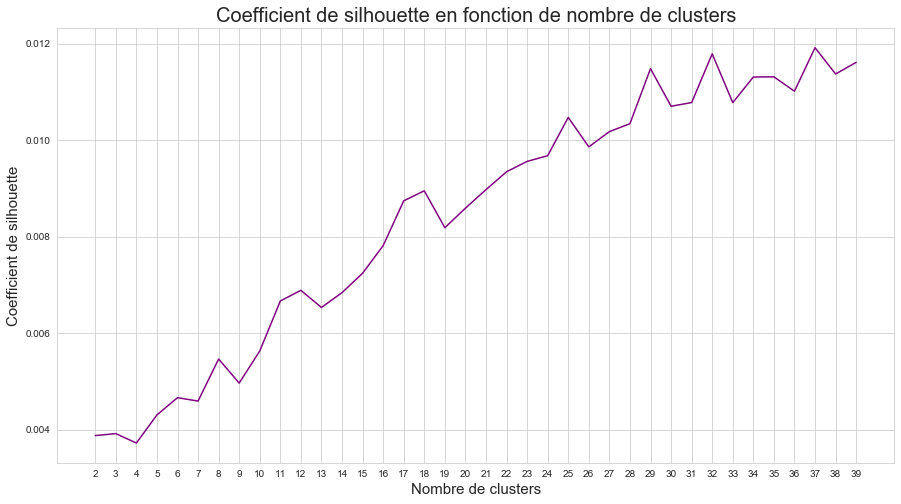

In [115]:
def choose_num_k(data, num_max):
    """Function which helps to choose an optimal number of clusters for MiniBatchKmeans algorithme.abs
    
    Inputs:
    - data : an array of data to be clusteres
    - num_max : a maximal number of clusters
    
    Output:
    - a plot of silhouette coefficient depending on number of clusters 
    
    """
    silhouette = []
    k = list(range(2, num_max))
    
    # Fit the model
    for i in k:
        kmeans = MiniBatchKMeans(n_clusters=i, init_size=1024, batch_size=2048, random_state=20)
        y_pred = kmeans.fit_predict(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette.append(score)
        
    # Plot the silhouette coefficient        
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Nombre de clusters', fontsize=15)
    ax.set_xticks(k)
    ax.set_xticklabels(k)
    ax.set_ylabel('Coefficient de silhouette', fontsize=15)
    ax.set_title('Coefficient de silhouette en fonction de nombre de clusters', fontsize=20)


    plt.plot(k, silhouette, color="purple")
    

choose_num_k(X_train_tfidf, 40)    

Nous allons choisir 14 clusters.

#### Créer le modèle

In [116]:
def predict_MiniBatchKMeans(data,k):
    """Function which returns a vector of k predicted clusters using MiniBatchKMeans algorithm.
    
    INPUTS:
    - data : en array of data to be clustered
    - k : number of clusters
    
    OUTPUT:
    - a vector of k predicted clusters    
    """
    # Fit the model
    kmeans = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20)
    
    # Predict clusters
    y_pred = kmeans.fit_predict(data)
    return y_pred
    


In [117]:
clusters = predict_MiniBatchKMeans(X_train_tfidf,14)   

#### Visualisation de clusters

In [118]:
def plot_clusters(X, clusters, k, model='PCA'):
    """Function to plot a 2D scatter plot of clusters. The dimensionnality reduction is done either by PCA
    or by t-SNE
    
    INPUTS:
    - X : array of data 
    - clusters : a vector of clusters (max = 14)
    - k : number of clusters
    - model : 'PCA' (default) or 'TSNE'
    
    OUTPUT:
    - a scatterplot of k clusters   
     
    
    """
    
    # Define the color's vector
    colors = ['salmon', 'khaki', 'darkviolet', 'black', 'blue', 'green', 'indigo', 
              'yellow', 'red', 'violet', 'c', 'darkslategrey', 'orange', 'olive']
    
    # Define the title
    mean_title = str('Title k-means clusters in ' + model + ' representation')
    
    # Format the cluster's vector
    y_pred_df = DataFrame(clusters)
    y_pred_df.rename({0: 'Cluster'}, axis=1, inplace=True)
    
    # Define the model
    if model=='PCA':
        mod = PCA(n_components=2)
    else:
        mod = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)
        
    # Fit the model
    principalComponents = mod.fit_transform(X)
    
    # Create the DataFrame of principal components + clusters
    principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'principal component 1', 'principal component 2'])
    principalDf = principalDf.merge(y_pred_df, left_index=True, right_index=True)
    
    # Plot the figure    
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=10)
    ax.set_ylabel('Principal Component 2', fontsize=10)
    ax.set_title(mean_title, fontsize=12)

    targets = list(range(k))
    for target, color in zip(targets, colors[:k]):
        indicesToKeep = principalDf['Cluster'] == target
        ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],
               principalDf.loc[indicesToKeep, 'principal component 2'], c=color, s=50, alpha=0.5)
    ax.legend(targets)
    ax.grid()
    

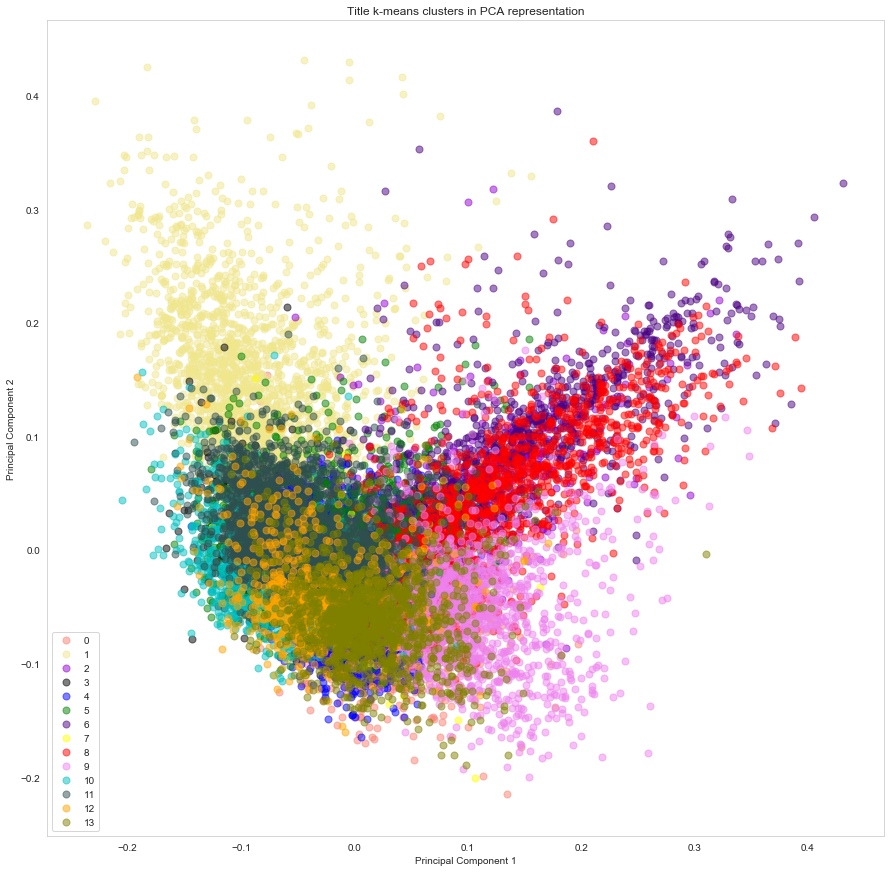

In [119]:
plot_clusters(X_train_tfidf, clusters, 14)

t-SNE

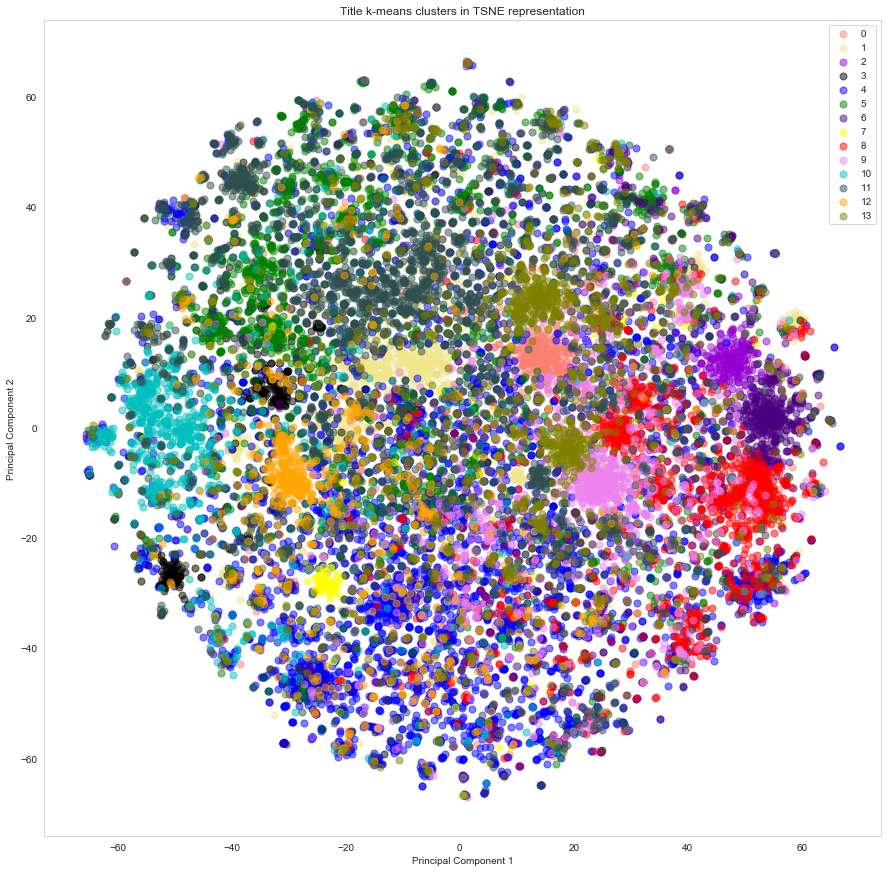

In [120]:
plot_clusters(X_train_tfidf, clusters, 14, model='TSNE')

#### Description de clusters

In [124]:
def print_top_words(k, vocabulary, distances, clusters):
    """Funtion which returns 10 top words for each cluster.abs
    
    INPUTS :
    - k : number of clusters
    - vocabulary : a list of vocabulary
    - distances : a list of distances
    - clusters : a vector of clusters
    
    OUTPUT :
    - print a list of 10 most frequent words for each cluster
    
    """
    
    top_words = DataFrame(zip(vocabulary, distances, clusters), 
                      columns=['word', 'dist', 'cluster'])
    for i in range(k):
        temp = top_words[top_words['cluster']==i]
        temp = temp.sort_values(['dist'], ascending=False)[:10]
        print("Cluster" + str(i) + ": ") 
        print(" ". join(list(temp['word'])))
        print('\n')
        

In [125]:
print_top_words(14, X_train_vocab_tfidf, X_train_dist_tfidf, clusters)

Cluster0: 
list row html package format email nothing csv far background


Cluster1: 
code column database text form date index load print default


Cluster2: 
store looking thread aws shown c++ e-g support maybe port


Cluster3: 
json update build module web send path instance process always


Cluster4: 
array class time set string add variable number query api


Cluster5: 
function user image object input view access loop click second


Cluster6: 
value page java property angular custom start setting figure much


Cluster7: 
type key display product db enter layer navigation compiler trying-make


Cluster8: 
file table result python http log open folder write order


Cluster9: 
data change line element command convert xml contains next day


Cluster10: 
application j model running check program tag missing argument mean


Cluster11: 
error server button name project script version window read event


Cluster12: 
c node google cs filter count implement please-help django correctly


C

### Feature = post pondéré

#### Choisir le nombre de clusters

Dans un premier temps, nous allons étudier le nombre de clusters optimal à l'aide de **coefficient de silhouette**.

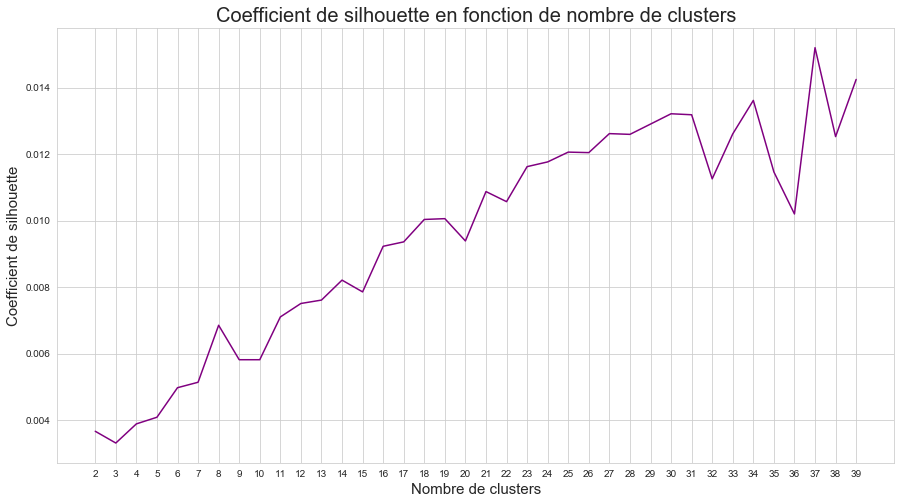

In [126]:
choose_num_k(X_train_w_tfidf, 40) 

Le coefficient de silhouette augmente avec le nombre de clusters. Il faudra faire un compromis entre le nombre de cluster raisonnable et la qualité de clusters. Nous allons choisir 14 clusters qui avec le coefficient de silhouette de 0.017 environ.

#### Créer le modèle

Nous allons choisir 14 clusters :

In [127]:
clusters = predict_MiniBatchKMeans(X_train_w_tfidf,14)   

#### Visualisation de clusters

Tout d'abord, nous allons visualiser les données avec l'ACP :

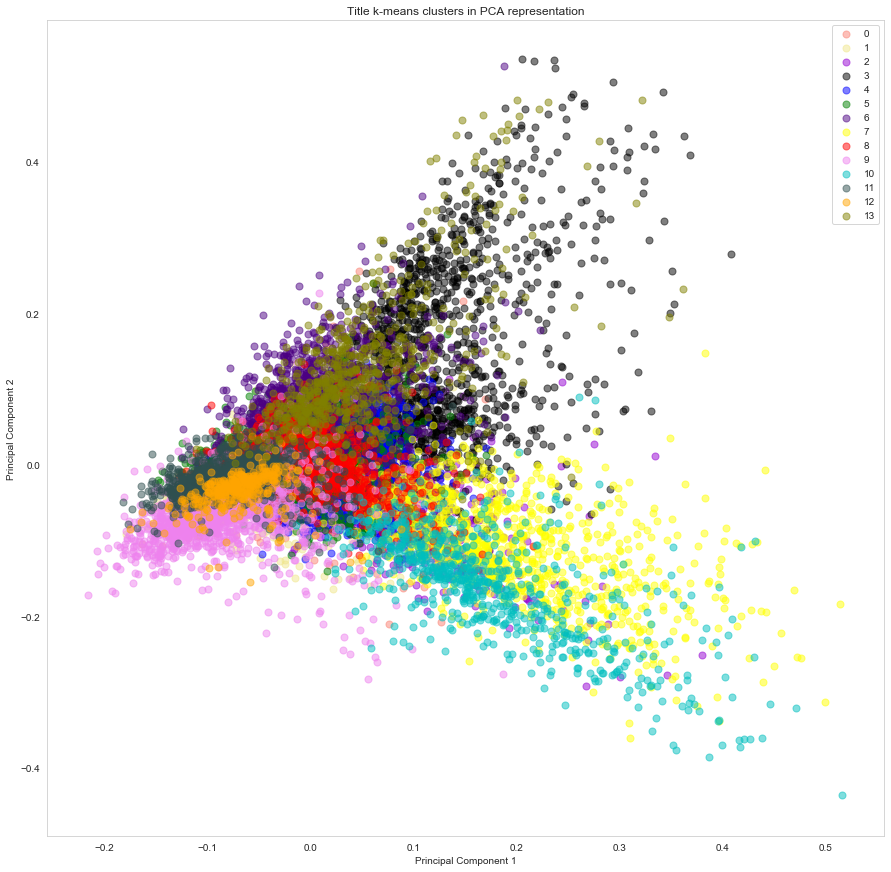

In [128]:
plot_clusters(X_train_w_tfidf, clusters, 14)

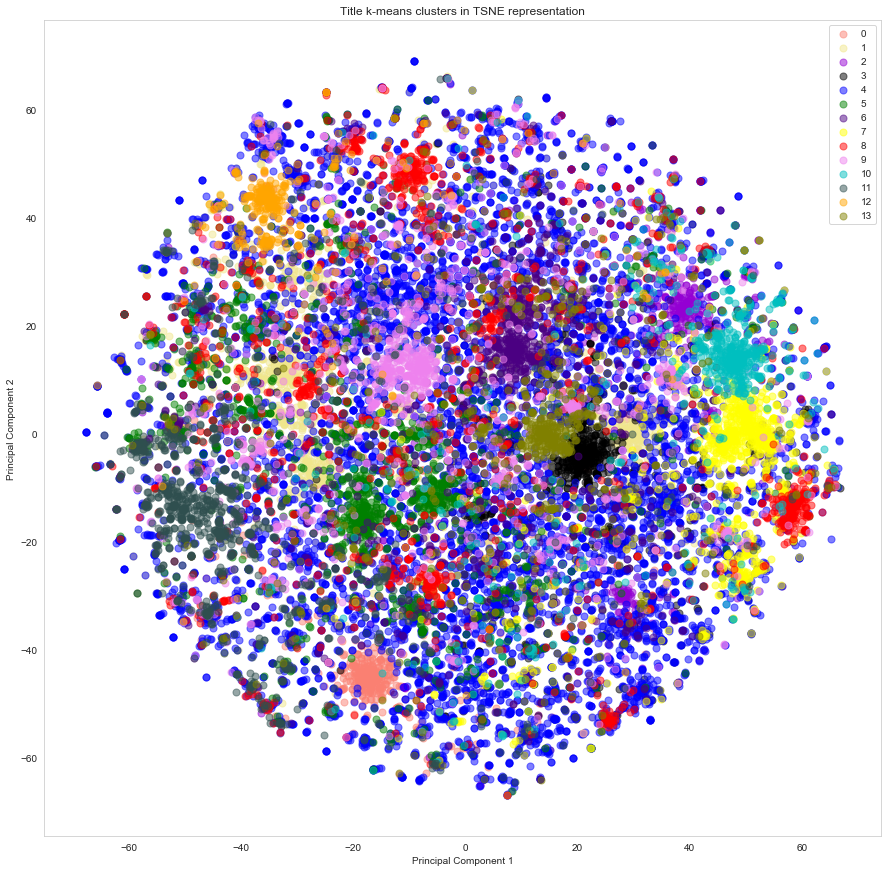

In [129]:
plot_clusters(X_train_w_tfidf, clusters, 14, model='TSNE')

#### Description de clusters

In [130]:
print_top_words(14, X_train_w_vocab_tfidf, X_train_w_dist_tfidf, clusters)

Cluster0: 
database version event controller cs core appreciated bootstrap extension etc


Cluster1: 
file time window custom map search r group color process


Cluster2: 
page google build insert reference background nested upload doc separate


Cluster3: 
image multiple property post link pas cell mysql c# within


Cluster4: 
error code data user list string method change set query


Cluster5: 
function class api result application project android script html model


Cluster6: 
variable view service item log character jquery missing match video


Cluster7: 
name access url format option last implement address block bar


Cluster8: 
value column object server type row php date running net


Cluster9: 
table python add read select statement attribute import creating delete


Cluster10: 
element output angular xml screen unable thread device next plugin


Cluster11: 
app http json key fix client console put word position


Cluster12: 
point argument aws site stop top returning oracle co

### Feature = titre

#### Choisir le nombre de clusters

Dans un premier temps, nous allons étudier le nombre de clusters optimal à l'aide de **coefficient de silhouette**.

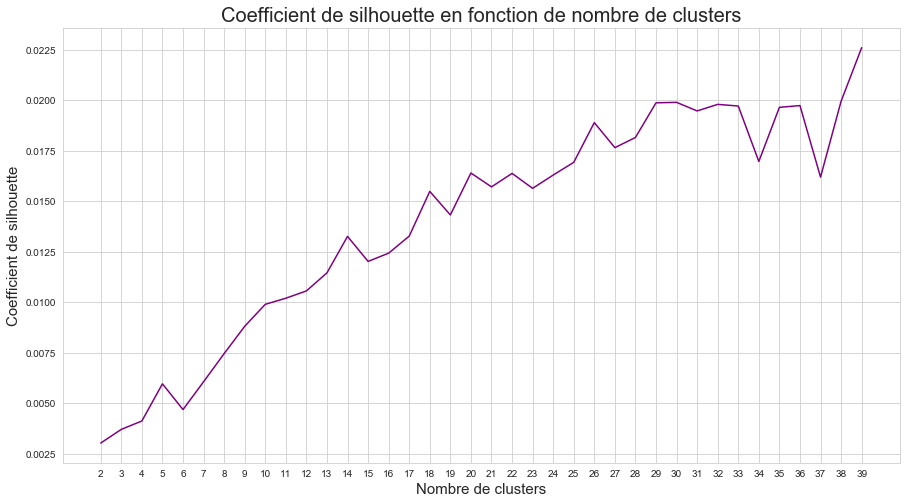

In [222]:
choose_num_k(X_train_title_tfidf[:10000], 40) 

Le coefficient de silhouette augmente avec le nombre de clusters. Il faudra faire un compromis entre le nombre de cluster raisonnable et la qualité de clusters. Nous allons choisir 14 clusters qui avec le coefficient de silhouette de 0.017 environ.

#### Créer le modèle

Nous allons choisir 14 clusters :

In [223]:
clusters = predict_MiniBatchKMeans(X_train_title_tfidf[:10000],14)   

#### Visualisation de clusters

Tout d'abord, nous allons visualiser les données avec l'ACP :

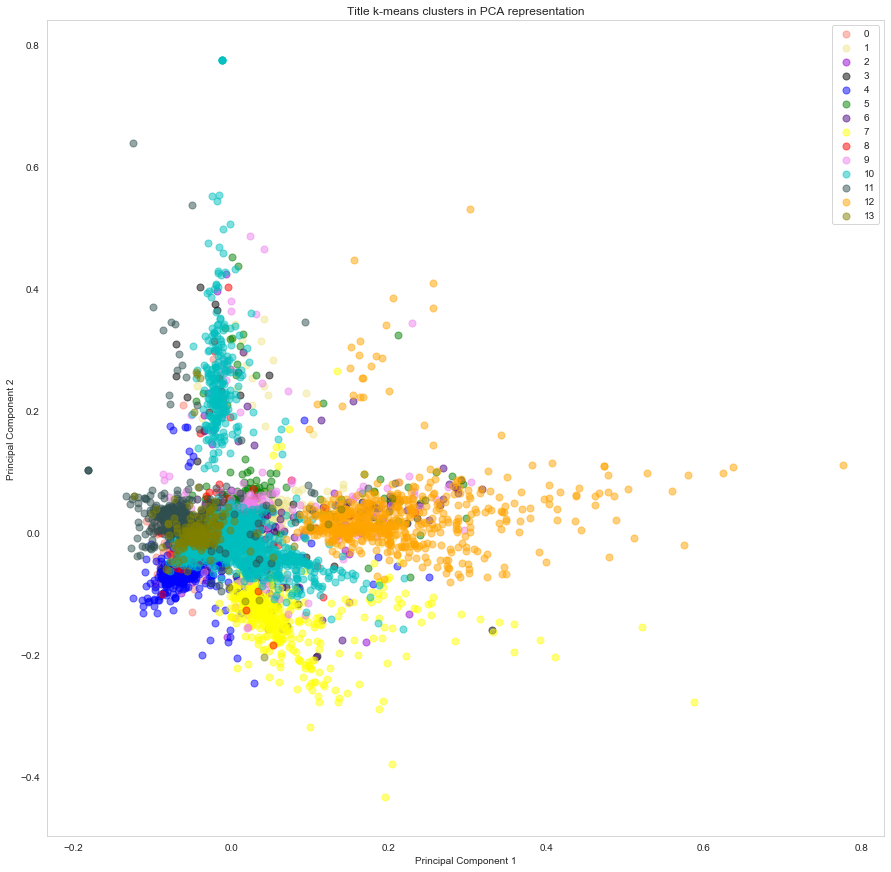

In [224]:
plot_clusters(X_train_title_tfidf[:10000], clusters, 14)

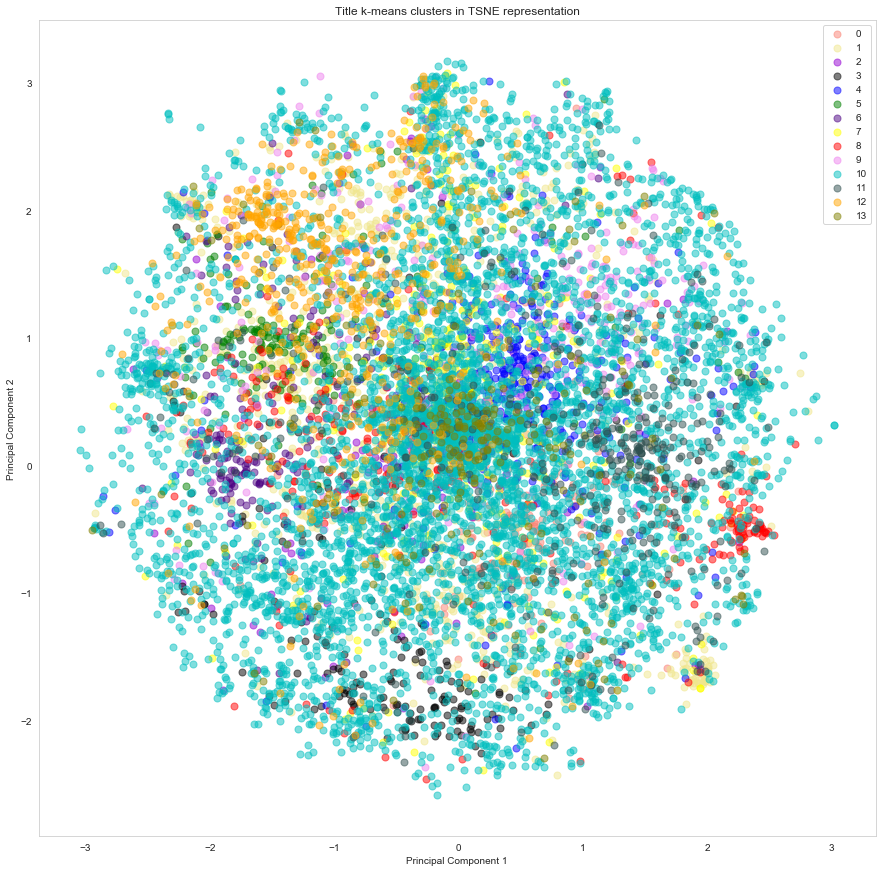

In [225]:
plot_clusters(X_train_title_tfidf[:10000], clusters, 14, model='TSNE')

#### Description de clusters

In [226]:
print_top_words(14, X_train_title_vocab_tfidf, X_train_title_dist_tfidf, clusters)

Cluster0: 
button parameter control plot matrix dependency installing false interface exist


Cluster1: 
set type time call url load open click background child


Cluster2: 
fix size template position session flask level network max previous


Cluster3: 
html dynamic format null argument login regex reference thread jenkins


Cluster4: 
list row script net r running unable studio package state


Cluster5: 
image select spring item web attribute address debug trouble setup


Cluster6: 
model read docker index single word empty source redirect tensorflow


Cluster7: 
method number send failed insert swift creating selenium ui calling


Cluster8: 
file component view django import difference stop storage random pattern


Cluster9: 
excel firebase azure connection token range dynamically program correctly entity


Cluster10: 
value data function python array object column multiple string table


Cluster11: 
change angular user page key property command remove path message


Cluster12: 
api

### Feature = tags

#### Choisir le nombre de clusters

Dans un premier temps, nous allons étudier le nombre de clusters optimal à l'aide de **coefficient de silhouette**.

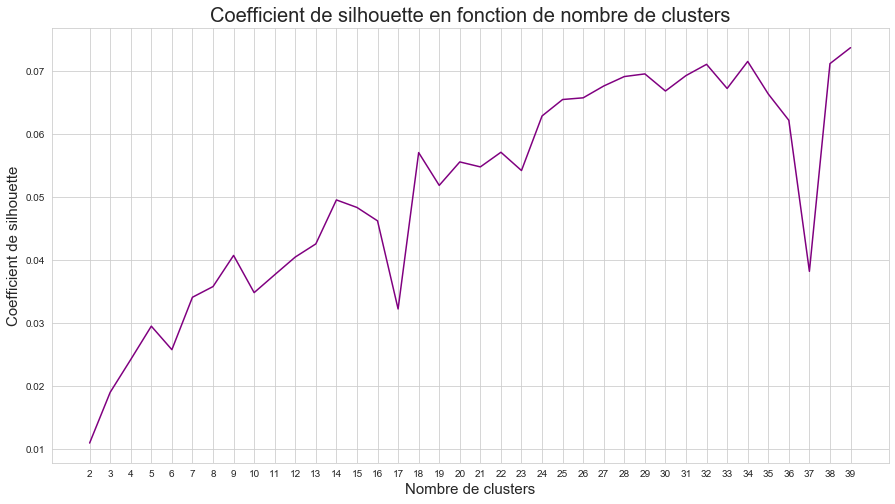

In [227]:
choose_num_k(y_train_tfidf[:10000], 40) 

#### Créer le modèle

Nous allons choisir 12 clusters :

In [228]:
clusters = predict_MiniBatchKMeans(y_train_tfidf[:10000],12)   

#### Visualisation de clusters

Tout d'abord, nous allons visualiser les données avec l'ACP :

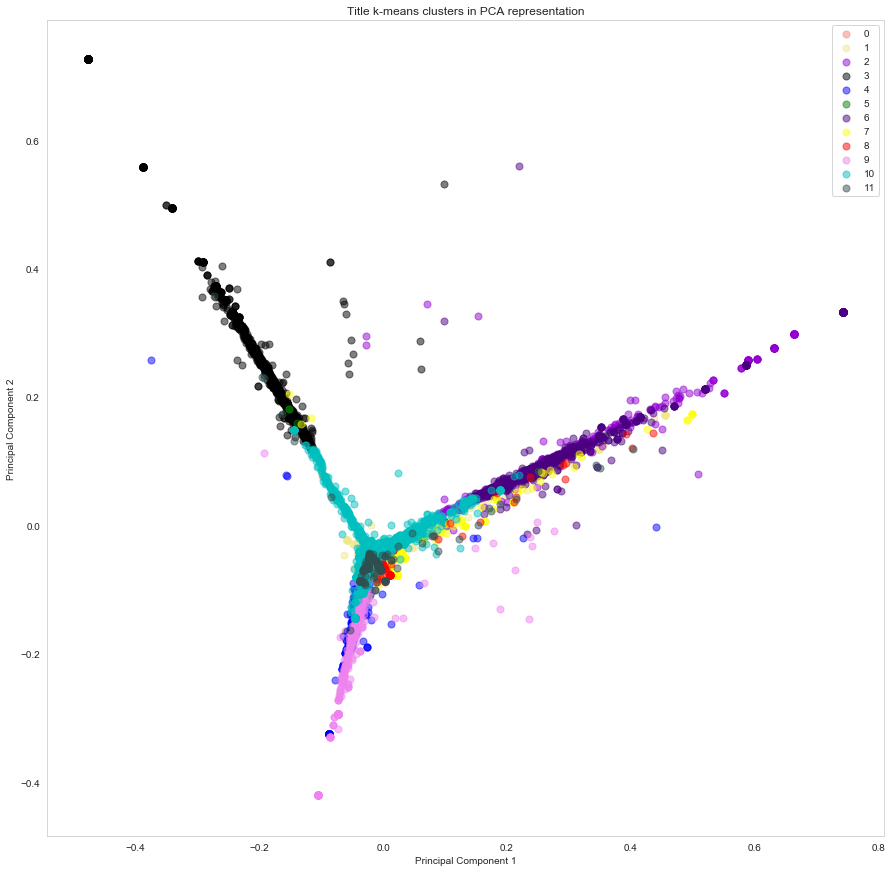

In [229]:
plot_clusters(y_train_tfidf[:10000], clusters, 12)

Le second graphique sera fait avec t-SNE:

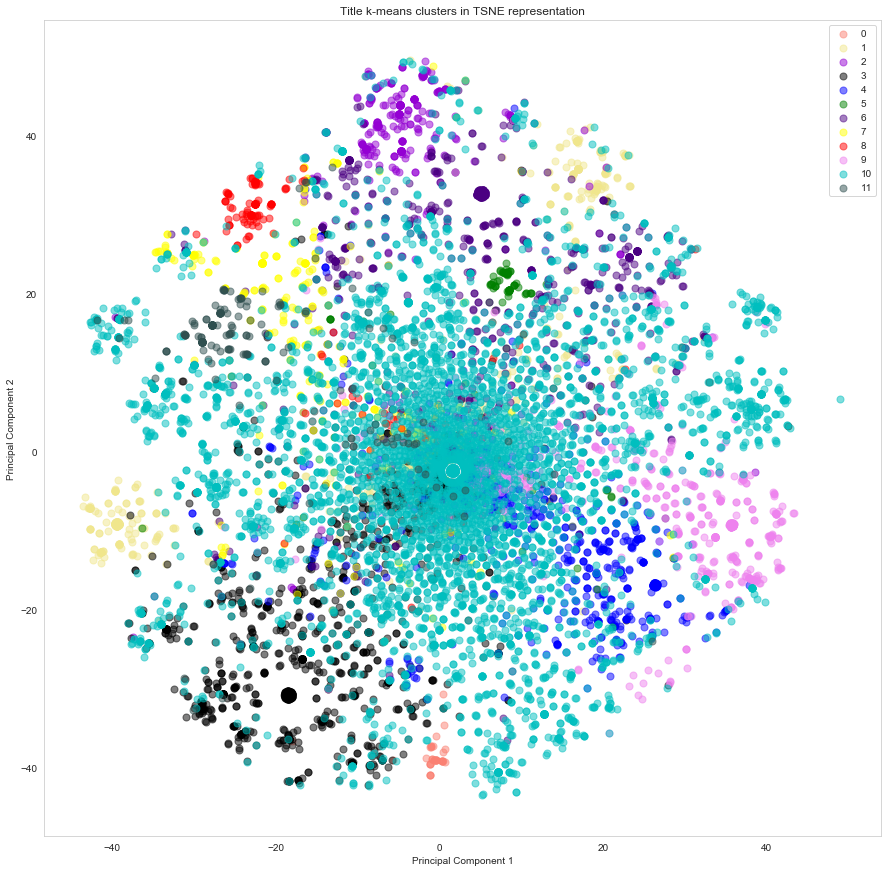

In [230]:
plot_clusters(y_train_tfidf[:10000], clusters, 12, model='TSNE')

#### Description de clusters

In [231]:
print_top_words(12, y_train_vocab_tfidf, y_train_dist_tfidf, clusters)

Cluster0: 
r woocommerce netbeans karma-jasmine parallel-processing api-gateway aspnetboilerplate dask scapy svm


Cluster1: 
linux dart unit-testing shell algorithm npm tsql haskell sorting recursion


Cluster2: 
c# sql wordpress mongodb dataframe unity3d oracle list ggplot2 graphql


Cluster3: 
javascript c++ pandas typescript kotlin asp.net-core apache-spark wpf keras go


Cluster4: 
php node.js sql-server react-native string multithreading vb.net hibernate xcode laravel-5


Cluster5: 
vue.js c++11 angular5 time f# generator doctrine marklogic prestashop amazon-rds


Cluster6: 
html jquery spring-boot git express scala loops webpack google-sheets datetime


Cluster7: 
matplotlib .net-core intellij-idea mysqli xaml animation shiny vue-component gitlab listview


Cluster8: 
android ubuntu templates cordova cassandra artificial-intelligence graphics yaml encoding react-router-v4


Cluster9: 
python-3.x angular css amazon-web-services powershell flask twitter-bootstrap image batch-file 

# Modélisation supervisée

## Features = BOW

### Création d'un jeu de données de validation

Nous allons travailler sur un échantillon de 10 000 posts.

In [257]:
X_train_ms, X_valid, y_train_ms, y_valid = model_selection.train_test_split(X_train_w_bow[:10000], y_train_0p1_bow[:10000], test_size=0.2, random_state=1)

### Régression logistique

In [258]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_ms, y_train_ms)

In [259]:
predicted_tags = model.predict(X_valid)

In [260]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.20      0.08      0.12        12
           1       0.00      0.00      0.00        11
           2       0.50      0.36      0.42        11
           3       0.50      0.20      0.29         5
           4       0.67      0.33      0.44        18
           5       0.67      0.53      0.59       125
           6       0.29      0.19      0.23        21
           7       0.68      0.52      0.59        62
           8       0.00      0.00      0.00         5
           9       0.43      0.75      0.55         4
          10       0.50      0.29      0.36         7
          11       1.00      1.00      1.00         2
          12       0.14      0.09      0.11        11
          13       0.39      0.45      0.42        31
          14       0.60      0.20      0.30        15
          15       0.18      0.18      0.18        11
          16       0.40      0.17      0.24        12
          17       0.33    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### KNN

In [261]:
knn = KNeighborsClassifier()
model = knn.fit(X_train_ms, y_train_ms)

In [262]:
predicted_tags = model.predict(X_valid)

In [263]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         5
           4       1.00      0.06      0.11        18
           5       0.50      0.06      0.10       125
           6       1.00      0.19      0.32        21
           7       0.83      0.08      0.15        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.50      0.23      0.31        31
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Arbres de décision

In [264]:
# Testing the decision tree model with default parameters
tree = DecisionTreeClassifier()
model = tree.fit(X_train_ms, y_train_ms)

In [265]:
predicted_tags = model.predict(X_valid)

In [266]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.17      0.08      0.11        12
           1       0.50      0.18      0.27        11
           2       0.38      0.27      0.32        11
           3       0.15      0.40      0.22         5
           4       0.47      0.39      0.42        18
           5       0.65      0.62      0.63       125
           6       0.46      0.29      0.35        21
           7       0.64      0.76      0.70        62
           8       0.00      0.00      0.00         5
           9       0.17      0.25      0.20         4
          10       0.50      0.43      0.46         7
          11       1.00      1.00      1.00         2
          12       0.17      0.09      0.12        11
          13       0.28      0.29      0.29        31
          14       0.25      0.13      0.17        15
          15       0.50      0.45      0.48        11
          16       0.40      0.17      0.24        12
          17       0.40    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Forêts aléatoires

In [267]:
# Testing the KNN model with default parameters
forest = RandomForestClassifier()
model = forest.fit(X_train_ms, y_train_ms)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [268]:
predicted_tags = model.predict(X_valid)

In [269]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         5
           4       1.00      0.06      0.11        18
           5       0.77      0.27      0.40       125
           6       0.00      0.00      0.00        21
           7       0.83      0.16      0.27        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## Features = TFIDF

### Création d'un jeu de données de validation

Nous allons travailler sur un échantillon de 10 000 posts.

In [270]:
X_train_ms, X_valid, y_train_ms, y_valid = model_selection.train_test_split(X_train_w_tfidf[:10000], y_train_0p1_bow[:10000], test_size=0.2, random_state=1)

### Régression logistique

In [271]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_ms, y_train_ms)

In [272]:
predicted_tags = model.predict(X_valid)

In [273]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.00      0.00      0.00        11
           2       0.50      0.27      0.35        11
           3       0.00      0.00      0.00         5
           4       0.67      0.22      0.33        18
           5       0.82      0.50      0.62       125
           6       0.80      0.19      0.31        21
           7       0.77      0.55      0.64        62
           8       0.00      0.00      0.00         5
           9       1.00      0.50      0.67         4
          10       1.00      0.14      0.25         7
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00        11
          13       0.67      0.26      0.37        31
          14       1.00      0.13      0.24        15
          15       0.20      0.09      0.13        11
          16       0.67      0.17      0.27        12
          17       0.50    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### KNN

In [274]:
knn = KNeighborsClassifier()
model = knn.fit(X_train_ms, y_train_ms)

In [275]:
predicted_tags = model.predict(X_valid)

In [276]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.50      0.18      0.27        11
           3       0.00      0.00      0.00         5
           4       0.57      0.22      0.32        18
           5       0.61      0.28      0.38       125
           6       0.57      0.19      0.29        21
           7       0.83      0.24      0.38        62
           8       0.00      0.00      0.00         5
           9       0.50      0.25      0.33         4
          10       0.50      0.14      0.22         7
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00        11
          13       0.58      0.23      0.33        31
          14       1.00      0.07      0.12        15
          15       0.17      0.09      0.12        11
          16       0.00      0.00      0.00        12
          17       0.33    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Arbres de décision

In [277]:
# Testing the decision tree model with default parameters
tree = DecisionTreeClassifier()
model = tree.fit(X_train_ms, y_train_ms)

In [278]:
predicted_tags = model.predict(X_valid)

In [279]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.11      0.08      0.10        12
           1       0.25      0.18      0.21        11
           2       0.33      0.36      0.35        11
           3       0.00      0.00      0.00         5
           4       0.43      0.33      0.38        18
           5       0.56      0.57      0.56       125
           6       0.30      0.33      0.32        21
           7       0.64      0.66      0.65        62
           8       0.00      0.00      0.00         5
           9       0.20      0.25      0.22         4
          10       1.00      0.14      0.25         7
          11       0.33      0.50      0.40         2
          12       0.00      0.00      0.00        11
          13       0.44      0.26      0.33        31
          14       0.14      0.07      0.09        15
          15       0.33      0.27      0.30        11
          16       0.22      0.17      0.19        12
          17       0.33    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Forêts aléatoires

In [280]:
# Testing the KNN model with default parameters
forest = RandomForestClassifier()
model = forest.fit(X_train_ms, y_train_ms)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [281]:
predicted_tags = model.predict(X_valid)

In [282]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       1.00      0.09      0.17        11
           3       0.00      0.00      0.00         5
           4       0.60      0.17      0.26        18
           5       0.77      0.48      0.59       125
           6       1.00      0.05      0.09        21
           7       0.81      0.48      0.61        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       1.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## Features = w2v1

Nous allons créer un jeu de donnée d'entraînement pour la sélection de modèle et pour sa validation. Le jeu de donné de validation nous servira à choisir le modèle que nous allons optimiser et entraîner sur le jeu de données d'entraînement complet. A la fin, nous allons tester les performances de modèle sur les données test.

In [283]:
X_train_ms, X_valid, y_train_ms, y_valid = model_selection.train_test_split(X_train_post_w2v1[:10000], y_train_0p1_bow[:10000], test_size=0.2, random_state=1)

### Régression logistique

In [284]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_ms, y_train_ms)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [285]:
predicted_tags = model.predict(X_valid)

In [286]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.20      0.36      0.26        11
           3       0.14      0.40      0.21         5
           4       0.18      0.22      0.20        18
           5       0.70      0.51      0.59       125
           6       0.11      0.19      0.14        21
           7       0.72      0.53      0.61        62
           8       0.00      0.00      0.00         5
           9       0.16      0.75      0.26         4
          10       0.40      0.29      0.33         7
          11       0.25      1.00      0.40         2
          12       0.06      0.09      0.07        11
          13       0.27      0.26      0.26        31
          14       0.16      0.33      0.22        15
          15       0.05      0.09      0.07        11
          16       0.22      0.33      0.27        12
          17       0.17    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### KNN

In [287]:
knn = KNeighborsClassifier()
model = knn.fit(X_train_ms, y_train_ms)

In [288]:
predicted_tags = model.predict(X_valid)

In [289]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.50      0.09      0.15        11
           3       0.33      0.20      0.25         5
           4       1.00      0.06      0.11        18
           5       0.71      0.38      0.50       125
           6       1.00      0.19      0.32        21
           7       0.79      0.18      0.29        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00        11
          13       0.62      0.26      0.36        31
          14       1.00      0.07      0.12        15
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Arbres de décision

In [290]:
# Testing the decision tree model with default parameters
tree = DecisionTreeClassifier()
model = tree.fit(X_train_ms, y_train_ms)

In [291]:
predicted_tags = model.predict(X_valid)

In [292]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.17      0.09      0.12        11
           2       0.07      0.09      0.08        11
           3       0.06      0.20      0.10         5
           4       0.06      0.06      0.06        18
           5       0.33      0.30      0.32       125
           6       0.00      0.00      0.00        21
           7       0.23      0.21      0.22        62
           8       0.08      0.20      0.12         5
           9       0.06      0.25      0.09         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.13      0.16      0.14        31
          14       0.06      0.07      0.06        15
          15       0.07      0.09      0.08        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Forêts aléatoires

In [293]:
# Testing the KNN model with default parameters
forest = RandomForestClassifier()
model = forest.fit(X_train_ms, y_train_ms)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [294]:
predicted_tags = model.predict(X_valid)

In [295]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        18
           5       1.00      0.06      0.11       125
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## Features = w2v2

Nous allons créer un jeu de donnée d'entraînement pour la sélection de modèle et pour sa validation. Le jeu de donné de validation nous servira à choisir le modèle que nous allons optimiser et entraîner sur le jeu de données d'entraînement complet. A la fin, nous allons tester les performances de modèle sur les données test.

In [296]:
X_train_ms, X_valid, y_train_ms, y_valid = model_selection.train_test_split(X_train_post_w2v2[:10000], y_train_0p1_bow[:10000], test_size=0.2, random_state=1)

### Régression logistique

In [297]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_ms, y_train_ms)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

In [298]:
predicted_tags = model.predict(X_valid)

In [299]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.18      0.36      0.24        11
           3       0.07      0.20      0.11         5
           4       0.19      0.22      0.21        18
           5       0.62      0.50      0.56       125
           6       0.15      0.19      0.17        21
           7       0.56      0.47      0.51        62
           8       0.00      0.00      0.00         5
           9       0.25      0.75      0.38         4
          10       0.50      0.57      0.53         7
          11       0.22      1.00      0.36         2
          12       0.05      0.09      0.06        11
          13       0.27      0.42      0.33        31
          14       0.14      0.27      0.18        15
          15       0.10      0.18      0.12        11
          16       0.22      0.33      0.27        12
          17       0.33    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### KNN

In [300]:
knn = KNeighborsClassifier()
model = knn.fit(X_train_ms, y_train_ms)

In [301]:
predicted_tags = model.predict(X_valid)

In [302]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.50      0.09      0.15        11
           3       0.00      0.00      0.00         5
           4       1.00      0.11      0.20        18
           5       0.70      0.36      0.48       125
           6       1.00      0.19      0.32        21
           7       0.83      0.24      0.38        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00        11
          13       0.67      0.26      0.37        31
          14       1.00      0.07      0.12        15
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Arbres de décision

In [303]:
# Testing the decision tree model with default parameters
tree = DecisionTreeClassifier()
model = tree.fit(X_train_ms, y_train_ms)

In [304]:
predicted_tags = model.predict(X_valid)

In [305]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.04      0.09      0.06        11
           3       0.00      0.00      0.00         5
           4       0.08      0.06      0.06        18
           5       0.35      0.28      0.31       125
           6       0.05      0.05      0.05        21
           7       0.13      0.11      0.12        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.14      0.14      0.14         7
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.03      0.03      0.03        31
          14       0.00      0.00      0.00        15
          15       0.11      0.18      0.14        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


### Forêts aléatoires

In [306]:
# Testing the random forest model with default parameters
forest = RandomForestClassifier()
model = forest.fit(X_train_ms, y_train_ms)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [307]:
predicted_tags = model.predict(X_valid)

In [308]:
y_valid.shape

(2000, 126)

In [309]:
predicted_tags.shape

(2000, 126)

In [310]:
print(classification_report(y_valid, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        18
           5       0.70      0.06      0.10       125
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## Choix de modèle

Le meilleur score F1 (0.49) est atteint avec la régression logistique et TF-IDF.

Nous allons exécuter le modèle sur le jeu de données d'entraînement complet (pour l'instant nous avons utilisé un échantillon de 10 000 questions). 

In [198]:
model_final = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_w_tfidf, y_train_0p1_bow)

## Validation du modèle sur les données test

### Cleaning & transformations données test

#### Feature

In [137]:
def post_to_words( raw_post ):
    """Function to convert a raw document to a string of words.
    
    Inputs : 
    
    - raw_post : a single string 
    
    Output :
    
    - a single string containing a preprocessed document"""
    
    # 1. Remove code
    
    liste = raw_post.split('code>')
    
    liste_clean = []
    for i in range(0,len(liste),2):
        elt = liste[i]
        liste_clean.append(elt) 
        
    string_clean = " ".join(liste_clean)
    
    # 2. Remove HTML
    post_text = BeautifulSoup(string_clean).get_text() 
    #
    # 3. Remove non-letters        
    letters_only = re.sub("[^#+a-zA-Z]", " ", post_text) 
    #
    # 4. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 5. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 6. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 7. Lematize
    lemmatizer = WordNetLemmatizer() 

    lems = []

    for word in meaningful_words:
        word_clean = lemmatizer.lemmatize(word)
        lems.append(word_clean)
    #
    # 8. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( lems )) 

In [138]:
X_test['body_clean']=X_test['body'].apply(lambda x: post_to_words(x))

In [139]:
X_test['title_clean']=X_test['title'].apply(lambda x: post_to_words(x))

In [140]:
def my_tokenizer(doc):
    
    """Function defining personalized tokenizer for sklearn's CountVectorizer in order to keep the created 
    bigrams in tag's format.
    
    Input:
    
    - doc : string to be tokenized
    
    Output:
    
    - tokenized string
    """
    
    
    tokens = doc.split()
    
    return tokens

In [141]:
stop_words = ["i'm", 'would', '1', '0', '2', "i've", 'could', 'anyone', 'also', '3', 'thanks', 
               'two', 'however', "i'd", '5', "+", "#", "im", "ive", "dont", "cant", "id", ")", "(", 'code','using','file','error','get',
 'like','using', 'get', 'like', 'want', 'use', 'work', 'one', 'trying', 'need', 'way', 'tried',
 'problem', 'following', 'run', 'example', 'help', 'new', 'know', 'working','make', 'create','first',
 'issue', 'find', 'see', 'different', 'show', 'return', 'test', 'question', 'getting', 'something',
 'try', 'able', 'e', 'another', 'used','without', 'look', 'please', 'possible', 'x', 'found','fine',
 'created', 'case', 'would-like', 'still', 'inside','wrong','right', 'give', 'seems', 'cannot',
 'idea', 'instead', 'sure', 'b', 'every', 'react', 'based', 'simple', 'got', 'v', 'already', 'look-like',
 'many', 'called', 'say', 'correct', 'main','specific','understand', 'added', 'since', 'currently',
 'back', 'current']

In [142]:
X_test['post_w'] = (X_test['title_clean'] + " ") *3 + " " + X_test['body_clean']

In [143]:
print ("Creating the TF - IDF...\n")
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
tf_idf = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = my_tokenizer,    \
                             preprocessor = None, \
                             strip_accents=None,
                             max_features = 5000,
                             lowercase=False,
                             stop_words = stop_words)   

Creating the TF - IDF...



In [144]:
X_test_w_tfidf = tf_idf.fit_transform(X_test['post_w'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
X_test_w_tfidf = X_test_w_tfidf.toarray()

#### Target

In [170]:
def cleaning_target(raw_target):
    """Function to remove '<>' signs from target list and to replace them with a space
    
    Arguments :
    - raw_target : a Series of tags
    
    Return :
    - Series with cleaned tags
       
    """
    
    #Remove first '<'
    tag = raw_target[1:]
    
    #Remove last '>'
    tag = tag[:-1]
    
    #Remove remaining '><' signs
    tag = tag.split('><')
    
    #Converting back to string
    tag_clean = " ".join(tag)  
    
    return tag_clean

In [171]:
y_test = y_test[1]

In [172]:
y_test_clean=y_test.apply(lambda x: cleaning_target(x))

In [173]:
# Create BOW of recoded target (add stop words)
print ("Creating the bag of words...\n")

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
tag_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = my_tokenizer,    \
                             preprocessor = None, \
                             strip_accents=None,
                             max_features = None,
                             lowercase=False,
                             stop_words = stop_words
                                )                       
                            

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

y_test_0p1_bow = tag_vectorizer.fit_transform(y_test_clean)

# Numpy arrays are easy to work with, so convert the result to an 
# array
y_test_0p1_bow = y_test_0p1_bow.toarray()

Creating the bag of words...



In [174]:
y_test_0p1_bow = tag_vectorizer.fit_transform(y_test_clean)

In [175]:
y_test_vocab_bow = tag_vectorizer.get_feature_names()

In [176]:
y_test_vocab_bow[:10]

['.htaccess',
 '.net',
 '.net-2.0',
 '.net-3.5',
 '.net-4.6',
 '.net-4.6.1',
 '.net-4.6.2',
 '.net-assembly',
 '.net-core',
 '.net-core-2.0']

In [177]:
stop_words_tags = [word for word in y_test_vocab_bow if word not in y_train_0p1_vocab_bow]

In [178]:
stop_words_tags += stop_words

In [179]:
len(stop_words_tags)

9692

In [180]:
# Create BOW of recoded target (add stop words)
print ("Creating the bag of words...\n")

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
tag_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = my_tokenizer,    \
                             preprocessor = None, \
                             strip_accents=None,
                             max_features = None,
                             lowercase=False,
                             stop_words = stop_words_tags
                                )                       
                            

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

y_test_0p1_bow = tag_vectorizer.fit_transform(y_test_clean)

# Numpy arrays are easy to work with, so convert the result to an 
# array
y_test_0p1_bow = y_test_0p1_bow.toarray()

Creating the bag of words...



In [181]:
y_test_0p1_bow.shape

(25000, 126)

In [191]:
y_test_vocab_bow = tag_vectorizer.get_feature_names()

In [192]:
y_test_vocab_bow

['.net',
 '.net-core',
 'ajax',
 'algorithm',
 'amazon-web-services',
 'android',
 'android-studio',
 'angular',
 'angular6',
 'angularjs',
 'apache',
 'apache-spark',
 'api',
 'arrays',
 'asp.net',
 'asp.net-core',
 'asp.net-mvc',
 'aws-lambda',
 'azure',
 'bash',
 'bootstrap-4',
 'c',
 'c#',
 'c++',
 'css',
 'css3',
 'csv',
 'dart',
 'database',
 'dataframe',
 'dictionary',
 'django',
 'docker',
 'excel',
 'express',
 'firebase',
 'firebase-realtime-database',
 'flask',
 'flutter',
 'for-loop',
 'forms',
 'function',
 'git',
 'go',
 'google-cloud-platform',
 'gradle',
 'hibernate',
 'html',
 'html5',
 'image',
 'ionic-framework',
 'ios',
 'java',
 'javascript',
 'jenkins',
 'jquery',
 'json',
 'keras',
 'kotlin',
 'kubernetes',
 'laravel',
 'laravel-5',
 'linux',
 'list',
 'loops',
 'machine-learning',
 'macos',
 'matplotlib',
 'maven',
 'mongodb',
 'multithreading',
 'mysql',
 'nginx',
 'node.js',
 'npm',
 'numpy',
 'opencv',
 'oracle',
 'pandas',
 'php',
 'postgresql',
 'powershell

In [194]:
y_train_0p1_vocab_bow

array(['.net', '.net-core', 'ajax', 'algorithm', 'amazon-web-services',
       'android', 'android-studio', 'angular', 'angular6', 'angularjs',
       'apache', 'apache-spark', 'api', 'arrays', 'asp.net',
       'asp.net-core', 'asp.net-mvc', 'aws-lambda', 'azure', 'bash',
       'bootstrap-4', 'c', 'c#', 'c++', 'css', 'css3', 'csv', 'dart',
       'database', 'dataframe', 'dictionary', 'django', 'docker', 'excel',
       'express', 'firebase', 'firebase-realtime-database', 'flask',
       'flutter', 'for-loop', 'forms', 'function', 'git', 'go',
       'google-cloud-platform', 'gradle', 'hibernate', 'html', 'html5',
       'image', 'ionic-framework', 'ios', 'java', 'javascript', 'jenkins',
       'jquery', 'json', 'keras', 'kotlin', 'kubernetes', 'laravel',
       'laravel-5', 'linux', 'list', 'loops', 'machine-learning', 'macos',
       'matplotlib', 'maven', 'mongodb', 'multithreading', 'mysql',
       'nginx', 'node.js', 'npm', 'numpy', 'opencv', 'oracle', 'pandas',
       'php', 'p

In [182]:
X_test_w_tfidf.shape

(25000, 5000)

### Validation de modèle

In [234]:
model_final = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_w_tfidf, y_train_0p1_bow)

In [235]:
predicted_tags = model_final.predict(X_test_w_tfidf)

In [238]:
predicted_tags.shape

(25000, 126)

In [240]:
y_train_0p1_vocab_bow[:10]

array(['.net', '.net-core', 'ajax', 'algorithm', 'amazon-web-services',
       'android', 'android-studio', 'angular', 'angular6', 'angularjs'],
      dtype='<U26')

In [254]:
# Sum up the counts of each post
n_predicted_tags = np.sum(predicted_tags, axis=1)

In [255]:
Series(n_predicted_tags).value_counts()

0    21848
1     2934
2      210
3        8
dtype: int64

Dans 21 848 cas sur 25 000 le modèle ne prédit aucun tag. 

In [256]:
print(classification_report(y_test_0p1_bow, predicted_tags))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.00      0.00      0.00        98
           2       0.00      0.00      0.00       194
           3       0.00      0.00      0.00       103
           4       0.00      0.00      0.00       226
           5       0.33      0.03      0.06      1428
           6       0.00      0.00      0.00       180
           7       0.02      0.00      0.00       714
           8       0.00      0.00      0.00        82
           9       0.06      0.12      0.08       122
          10       0.00      0.00      0.00        80
          11       0.00      0.00      0.00       139
          12       0.00      0.00      0.00       131
          13       0.00      0.00      0.00       355
          14       0.00      0.00      0.00       210
          15       0.00      0.00      0.00       156
          16       0.00      0.00      0.00       165
          17       0.00    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
